**INSTALLING APYORI LIBRARY**

In [287]:
pip install apyori

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**IMPORTING LIBRARY**

In [288]:
from apyori import apriori
import pandas as pd

**READING THE DATASET**

In [289]:
data = pd.read_csv('Season4.csv')

In [290]:
data

,Date,Product,Customer_Category
0,01/10/2023,"['Coconut oil', 'Laundry Detergent']",Middle-Aged
1,01/10/2023,"['Chocolate', 'Spinach']",Young Adult
2,01/10/2023,"['Vinegar', 'Mop', 'Insect Repellent', 'Peanut...",Young Adult
3,01/10/2023,"['Juices','Chips', 'Dustpan', 'Vinegar', 'Whea...",Middle-Aged
4,01/10/2023,"['Dhal', 'Insect Repellent', 'Soap', 'Wheat Ra...",Young Adult
...,...,...,...
6493,31/12/2023,"['Banana', 'Cereal Bars', 'Hair Gel', 'Baby Wi...",Young Adult
6494,31/12/2023,"['Trash Bags', 'Plant Fertilizer', 'Chocolate']",Young Adult
6495,31/12/2023,"['Wheat FLour','Vegetables,'Dhal', 'Tomatoes',...",Middle-Aged
6496,31/12/2023,"['Paper Towel For Faces', 'Yogurt']",Young Adult


**Convert the 'Items' column into a list of items**

In [291]:
data['Product'] = data['Product'].apply(lambda x: [item.strip() for item in x.split(',')])

In [292]:
data['Product']

0                  [['Coconut oil', 'Laundry Detergent']]
1                              [['Chocolate', 'Spinach']]
2       [['Vinegar', 'Mop', 'Insect Repellent', 'Peanu...
3       [['Juices', 'Chips', 'Dustpan', 'Vinegar', 'Wh...
4       [['Dhal', 'Insect Repellent', 'Soap', 'Wheat R...
                              ...                        
6493    [['Banana', 'Cereal Bars', 'Hair Gel', 'Baby W...
6494    [['Trash Bags', 'Plant Fertilizer', 'Chocolate']]
6495    [['Wheat FLour', 'Vegetables, 'Dhal', 'Tomatoe...
6496                [['Paper Towel For Faces', 'Yogurt']]
6497                                      [['Deodorant']]
Name: Product, Length: 6498, dtype: object

**Information of the data**

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               6498 non-null   object
 1   Product            6498 non-null   object
 2   Customer_Category  6498 non-null   object
dtypes: object(3)
memory usage: 152.4+ KB


**Data Preprocessing**

**shape of the Data**

In [294]:
data.shape

(6498, 3)

**checking Null values**

In [295]:
data.isnull().sum()

Date                 0
Product              0
Customer_Category    0
dtype: int64

**DATA VISULAIZATION OF THE CUSTOMER_CATEGORY**

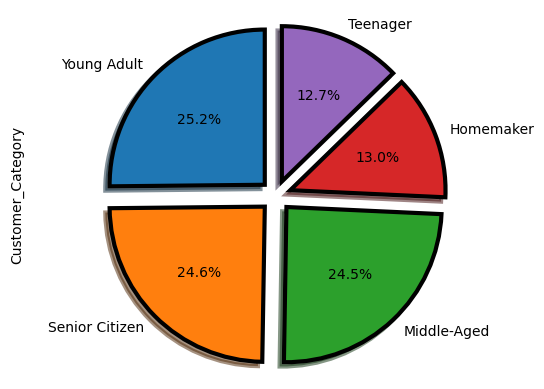

In [296]:
import matplotlib.pyplot as plt
data['Customer_Category'].value_counts().plot(kind='pie', explode=(0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={"edgecolor":'black',"linewidth":3,"antialiased": True})
plt.axis('equal')
plt.show()


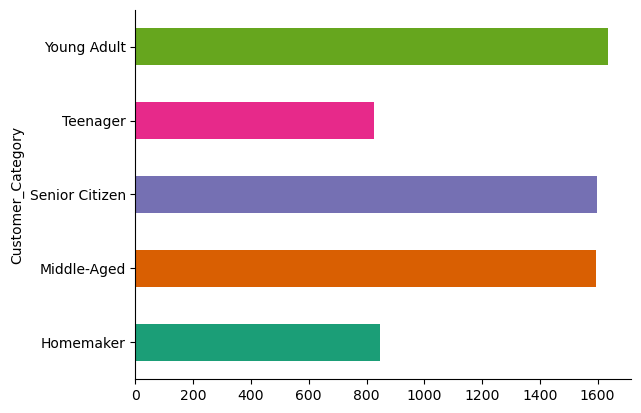

In [297]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Customer_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

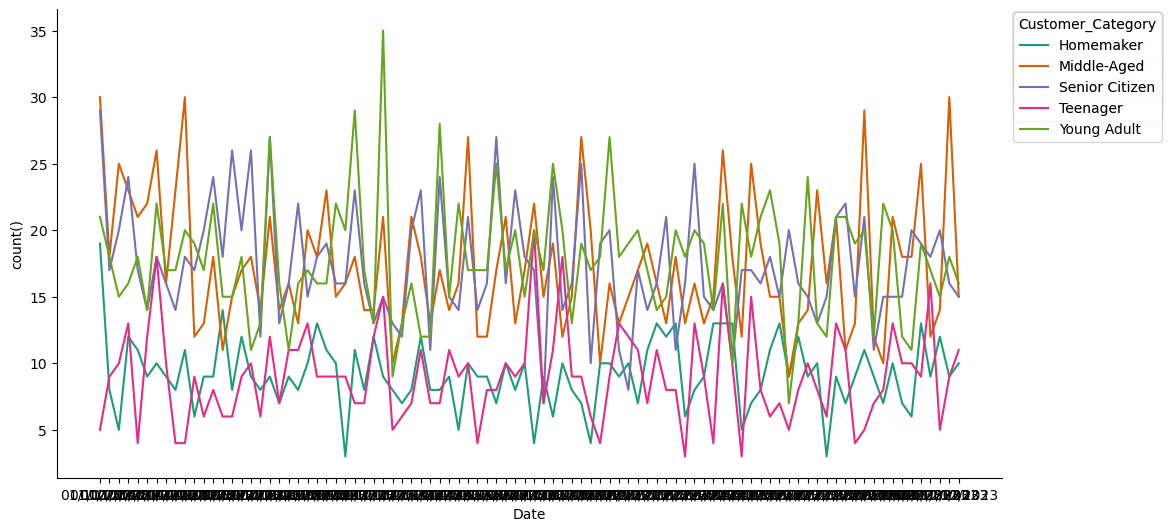

In [298]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer_Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer_Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

**Convert DataFrame to a list of lists (required format for apyori)**

In [299]:
transactions = data['Product'].tolist()

In [300]:
transactions

[["['Coconut oil'", "'Laundry Detergent']"],
 ["['Chocolate'", "'Spinach']"],
 ["['Vinegar'", "'Mop'", "'Insect Repellent'", "'Peanut Butter']"],
 ["['Juices'",
  "'Chips'",
  "'Dustpan'",
  "'Vinegar'",
  "'Wheat Flour'",
  "'Eggs']"],
 ["['Dhal'", "'Insect Repellent'", "'Soap'", "'Wheat Rava']"],
 ["['Honey'", "'Trash Bags']"],
 ["['Toilet Freshner'", "'Wheat Flour']"],
 ["['Vinegar']"],
 ["['Laundry Detergent'", "'Diapers'", "'Banana'", "'Dishwash scrubber']"],
 ["['Hair Gel'", "'Kambu Rice'", "'Plant Fertilizer']"],
 ["['Power Strips']"],
 ["['Spinach'", "'Wheat Flour']"],
 ["['Milk'", "'Yogurt']"],
 ["['Yogurt'",
  "'Trash Bags'",
  "'Broom'",
  "'Rice'",
  "'Spices'",
  "'Wheat Flour'",
  "'Shaving Cream']"],
 ["['Juices'", "'Chips']"],
 ["['Wheat Flour'", "'Power Strips'", "'Hand Sanitizer'", "'Deodorant']"],
 ["['Ice Cream']"],
 ["['Nuts'", "'Kambu Rice'", "'Honey'", "'Pickles']"],
 ["['Toothbrush'", "'Power Strips'", "'Pasta']"],
 ["['Nuts'", "'Pickles'", "'Dish Soap'", "'Bana

**Perform association rule mining using Apriori algorithm**

In [301]:
results = list(apriori(transactions, min_support=0.01, min_confidence=0.7))

**RESULT**

In [302]:
for rule in results:
    print(rule)

RelationRecord(items=frozenset({"['Juices'", "'Chips'"}), support=0.01061865189289012, ordered_statistics=[OrderedStatistic(items_base=frozenset({"['Juices'"}), items_add=frozenset({"'Chips'"}), confidence=0.8518518518518517, lift=23.355836849507735)])
RelationRecord(items=frozenset({"'Dhal'", "'Vegetables"}), support=0.04724530624807633, ordered_statistics=[OrderedStatistic(items_base=frozenset({"'Vegetables"}), items_add=frozenset({"'Dhal'"}), confidence=0.7172897196261683, lift=8.413264617564696)])
RelationRecord(items=frozenset({"'Dhal'", "['Wheat FLour'"}), support=0.022314558325638657, ordered_statistics=[OrderedStatistic(items_base=frozenset({"['Wheat FLour'"}), items_add=frozenset({"'Dhal'"}), confidence=1.0, lift=11.729241877256317)])
RelationRecord(items=frozenset({"'Paper Towel for Faces'", "['Feminine Hygiene Products'"}), support=0.010003077870113881, ordered_statistics=[OrderedStatistic(items_base=frozenset({"['Feminine Hygiene Products'"}), items_add=frozenset({"'Paper T

In [303]:
# Assuming you have a dataset called 'transactions' where each transaction is a list of items
# And 'results' is a list of tuples where each tuple contains the rule, support, and confidence

for Product in results:
    pair = Product[0]
    items = [x for x in pair]
    
    if len(items) > 2:
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(Product[1]))
        print("Confidence: " + str(Product[2][0][2]))
        
    else:
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(Product[1]))
        print("Confidence: " + str(Product[2][0][2]))
    
    # Calculate lift
    item1_count = sum(1 for transaction in transactions if items[0] in transaction)
    item2_count = sum(1 for transaction in transactions if items[1] in transaction)
    rule_count = sum(1 for transaction in transactions if all(item in transaction for item in items))
    
    total_transactions = len(transactions)
    item1_support = item1_count / total_transactions
    item2_support = item2_count / total_transactions
    rule_support = rule_count / total_transactions
    
    lift = rule_support / (item1_support * item2_support)
    print("Lift: " + str(lift))
    print("=====================================")


Rule: ['Juices' -> 'Chips'
Support: 0.01061865189289012
Confidence: 0.8518518518518517
Lift: 23.35583684950773
Rule: 'Dhal' -> 'Vegetables
Support: 0.04724530624807633
Confidence: 0.7172897196261683
Lift: 8.413264617564696
Rule: 'Dhal' -> ['Wheat FLour'
Support: 0.022314558325638657
Confidence: 1.0
Lift: 11.729241877256317
Rule: 'Paper Towel for Faces' -> ['Feminine Hygiene Products'
Support: 0.010003077870113881
Confidence: 0.7738095238095238
Lift: 35.66109422492401
Rule: 'Spices' -> 'Rice']
Support: 0.01123422591566636
Confidence: 1.0
Lift: 17.705722070844686
Rule: 'Vegetables -> 'Wheat FLour'
Support: 0.04863034779932287
Confidence: 0.7383177570093459
Lift: 15.182242990654206
Rule: ['Wheat FLour' -> 'Vegetables
Support: 0.018159433671899046
Confidence: 0.8137931034482759
Lift: 12.35520464067032
Rule: 'Dhal' -> 'Vegetables
Support: 0.030009233610341645
Confidence: 1.0
Lift: 5.343930294544351
Rule: 'Dhal' -> ['Wheat FLour'
Support: 0.018159433671899046
Confidence: 0.8137931034482759
L

# FIND THE LOW SUPPORT IN THE DATASET

In [304]:
results = list(apriori(transactions, min_support=0.001))
results

[RelationRecord(items=frozenset({"'Air Freshener'"}), support=0.01569713758079409, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Air Freshener'"}), confidence=0.01569713758079409, lift=1.0)]),
 RelationRecord(items=frozenset({"'Air Freshener']"}), support=0.009387503847337643, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Air Freshener']"}), confidence=0.009387503847337643, lift=1.0)]),
 RelationRecord(items=frozenset({"'Apple'"}), support=0.013542628501077255, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Apple'"}), confidence=0.013542628501077255, lift=1.0)]),
 RelationRecord(items=frozenset({"'Apple']"}), support=0.009695290858725761, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Apple']"}), confidence=0.009695290858725761, lift=1.0)]),
 RelationRecord(items=frozenset({"'Baby Wipes'"}), support=0.014158202523853494, ordered_statistic

# FINDING THE HIGH SUPPORT IN THE DATASET

In [305]:
results = list(apriori(transactions, min_support=0.04))
results

[RelationRecord(items=frozenset({"'Biscuit'"}), support=0.045706371191135735, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Biscuit'"}), confidence=0.045706371191135735, lift=1.0)]),
 RelationRecord(items=frozenset({"'Dhal'"}), support=0.08525700215450908, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Dhal'"}), confidence=0.08525700215450908, lift=1.0)]),
 RelationRecord(items=frozenset({"'Rice'"}), support=0.04601415820252385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Rice'"}), confidence=0.04601415820252385, lift=1.0)]),
 RelationRecord(items=frozenset({"'Spices'"}), support=0.056478916589719916, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Spices'"}), confidence=0.056478916589719916, lift=1.0)]),
 RelationRecord(items=frozenset({"'Vegetables"}), support=0.06586642043705755, ordered_statistics=[OrderedStatistic(items_base=frozens

# TO FIND THE DHAL (MAXIMUM-CONFIDENT LEVEL) IN THE DATASET


In [306]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
dataset=[['Dhal', 'Insect Repellent', 'Soap', 'Wheat Rava'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Toilet Freshner', 'Mustard', 'Tea', 'Biscuit'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Potatoes', 'Tomatoes', 'Cereal Bars', 'Wheat Flour', 'Vegetables', 'Dhal', 'Nuts'],
         ['Light Bulbs', 'Cooking Oil', 'Dhal', 'Pickles'],
         ['Wheat Rava', 'Dhal', 'Spices', 'Rice'],
         ['Onions', 'Wheat Flour', 'Broom', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cooking Oil', 'Hair Gel'],
         ['Trash Bags', 'Coffee', 'Biscuit', 'Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Rava', 'Mop', 'Spices', 'Dhal', 'Bread'],
         ['Dhal', 'Spices', 'Rice', 'Tissues', 'Kambu Rice'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags'],
         ['Sugar', 'Dhal', 'Body wash', 'Baby Wipes', 'Paper Towel For Faces'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Saftey Razor Blade', 'Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Toothbrush', 'Eggs'],
         ['Sugar', 'Deodorant', 'Saftey Razor Blade', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Semiya', 'Spices', 'Rice', 'Dhal'],
         ['Rice', 'Spices', 'Dhal'],
         ['Dhal', 'Chips', 'Milk'],
         ['Pickles', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Hand Sanitizer', 'Shampoo'],
         ['Soda', 'Jam', 'Bread', 'Wheat Rava', 'Nuts', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Juices', 'Chips'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chocolate'],
         ['Dhal', 'Dish Soap'],
         ['Power Strips', 'Diapers', 'Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Insect Repellent', 'Body wash', 'Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes', 'Banana'],
         ['Baby Wipes', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dish Soap', 'Banana', 'Eggs', 'Spices', 'Rice'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Cleaning Spray', 'Rice', 'Spices', 'Chocolate', 'Olive Oil', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vinegar', 'Honey', 'Kambu Rice'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Power Strips', 'Spices'],
         ['Salt', 'Shampoo', 'Toothbrush', 'Body wash', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Banana', 'Ice Cream', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes', 'Cooking Oil'], 
         ['Hair Gel', 'Dhal', 'Onions', 'Stationery'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Salt', 'Toothbrush', 'Spices'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Jam', 'Bread', 'Air Freshener', 'Eggs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Orange'],
         ['Sugar', 'Dhal', 'Cleaner'],
         ['Paper Towel For Faces', 'Mustard', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt'],
         ['Cooking Oil', 'Sugar', 'Dhal', 'Juices', 'Chips'],
         ['Onions', 'Shampoo', 'Cereal', 'Dhal'],
         ['Cleaner', 'Ragi Malt', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Peanut Butter', 'Tomatoes', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Cereal Bars', 'Dhal', 'Stationery', 'Broom'],
         ['Trash Bags', 'Dhal'],
         ['Dhal', 'Milk', 'Shaving Cream'],
         ['Toilet Freshner', 'Wheat Flour', 'Vegetables', 'Dhal', 'Yogurt'],
         ['Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags', 'Chocolate', 'Pasta'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Salt'],
         ['Banana', 'Hair Gel', 'Olive Oil', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Kambu Rice', 'Black pepper'],
         ['Hair Gel', 'Cereal', 'Hand Sanitizer', 'Semiya', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Vegetables'],
         ['Dhal', 'Kambu Rice', 'Dish Soap', 'Spices', 'Cheese'],
         ['Dhal', 'Spices', 'Rice'],
         ['Olive Oil', 'Orange', 'Cheese', 'Tomatoes', 'Dhal'],
         ['Bread', 'Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Insect Repellent'],
         ['Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Eggs', 'Toilet Freshner', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Spices', 'Rice'],
         ['Dhal', 'Cereal Bars', 'Vegetables', 'Apple'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tissues', 'Chocolate', 'Soda'],
         ['Plant Fertilizer', 'Milk', 'Pickles', 'Wheat Flour', 'Vegetables', 'Dhal', 'Deodorant'],
         ['Air Freshener', 'Banana', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Paper Towel For Faces', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Black pepper', 'Eggs', 'Ragi Malt'],
         ['Coconut oil', 'Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal', 'Toothbrush', 'Spinach'],
         ['Laundry Detergent', 'Dhal'],
         ['Baby Wipes', 'Soda', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pickles', 'Soap'],
         ['Dhal', 'Hand Sanitizer', 'Dustpan', 'Paper Towel For Faces'],
         ['Dhal', 'Jam', 'Bread', 'Cheese'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables', 'Vinegar', 'Deodorant', 'Juices', 'Chips'],
         ['Cheese', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Cleaner', 'Dhal', 'Spices', 'Rice', 'Tissues', 'Orange', 'Peanut Butter'],
         ['Carrots', 'Shampoo', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Cheese', 'Dhal', 'Banana'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Stationery', 'Cleaner', 'Honey'],
         ['Plant Fertilizer', 'Wheat Flour', 'Vegetables', 'Dhal', 'Insect Repellent', 'Salt'],
         ['Yogurt', 'Coffee', 'Biscuit', 'Stationery', 'Pasta', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vinegar', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables', 'Juices', 'Chips', 'Spices', 'Juices', 'Chips'],
         ['Cheese', 'Dhal'],
         ['Rice', 'Spices', 'Wheat Flour', 'Vegetables', 'Dhal', 'Sugar'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Toothbrush', 'Tea', 'Biscuit'],
         ['Milk', 'Kambu Rice', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Onions'],
         ['Dhal', 'Spices', 'Rice', 'Honey', 'Pickles'],
         ['Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers'],
         ['Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Ketchup', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dishwash scrubber', 'Milk'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dhal', 'Ice Cream'],
         ['Tea', 'Biscuit', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables', 'Spinach'],
         ['Orange', 'Pickles', 'Eggs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Banana'],
         ['Tomatoes', 'Tea', 'Biscuit', 'Dhal', 'Dishwash scrubber', 'Soda'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Shampoo', 'Honey', 'Trash Bags', 'Banana'],
         ['Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Milk', 'Shampoo', 'Banana', 'Chocolate', 'Dhal'],
         ['Trash Bags', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal Bars'],
         ['Cleaning Spray', 'Wheat Flour', 'Vegetables', 'Dhal', 'Honey', 'Deodorant'],
         ['Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Rava'],
         ['Diapers', 'Cleaner', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Toilet Freshner', 'Wheat Flour', 'Vegetables', 'Dhal', 'Nuts', 'Broom', 'Sugar'],
         ['Semiya', 'Dhal'],
         ['Shampoo', 'Air Freshener', 'Shower Gel', 'Rice', 'Spices', 'Dhal'],
         ['Dhal', 'Vegetables', 'Wheat Flour', 'Laundry Detergent'],
         ['Rice', 'Spices', 'Cheese', 'Insect Repellent', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Milk', 'Potatoes', 'Pickles', 'Dhal'],
         ['Dustpan', 'Wheat Flour', 'Vegetables', 'Dhal', 'Bread', 'Chips', 'Juices', 'Chips'],
         ['Coffee', 'Biscuit', 'Honey', 'Coconut oil', 'Toilet Freshner', 'Dhal'],
         ['Dhal'],
         ['Dhal', 'Broom', 'Chocolate', 'Plant Fertilizer', 'Deodorant'],
         ['Light Bulbs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dustpan', 'Wheat Rava', 'Soap'],
         ['Milk', 'Dhal', 'Rice', 'Spices', 'Black pepper', 'Coffee', 'Biscuit'],
         ['Insect Repellent', 'Potatoes', 'Potatoes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt'],
         ['Paper Towel For Faces', 'Dhal'],
         ['Sugar', 'Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal', 'Bread'],
         ['Dhal', 'Cereal', 'Dishwash scrubber', 'Stationery', 'Power Strips'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Pasta'],
         ['Apple', 'Wheat Flour', 'Vegetables', 'Dhal', 'Saftey Razor Blade'],
         ['Dhal', 'Saftey Razor Blade', 'Deodorant', 'Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Soap', 'Mustard', 'Baby Wipes', 'Sugar', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Dhal', 'Spices', 'Rice', 'Chocolate', 'Deodorant', 'Coconut oil'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Hair Gel', 'Trash Bags', 'Rice', 'Spices', 'Kambu Rice'],
         ['Hair Gel', 'Diapers', 'Wheat Flour', 'Vegetables', 'Dhal', 'Deodorant'],
         ['Tea', 'Biscuit', 'Honey', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Toothbrush', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Broom', 'Pasta'],
         ['Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Onions', 'Stationery'],
         ['Honey', 'Coffee', 'Biscuit', 'Dhal'],
         ['Dhal', 'Cereal', 'Chips', 'Spinach'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Dhal', 'Spices', 'Rice'],
         ['Spices', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar'],
         ['Banana', 'Coffee', 'Biscuit', 'Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal', 'Power Strips', 'Mustard', 'Pickles'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ketchup', 'Shampoo', 'Deodorant'],
         ['Deodorant', 'Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Dishwash scrubber', 'Pasta', 'Dhal', 'Dustpan'],
         ['Vinegar', 'Rice', 'Spices', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Mop', 'Spices', 'Semiya', 'Dhal', 'Mop'],
         ['Broom', 'Pasta', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Deodorant'],
         ['Saftey Razor Blade', 'Wheat Flour', 'Vegetables', 'Dhal', 'Body wash', 'Yogurt', 'Jam', 'Bread'],
         ['Coffee', 'Biscuit', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard', 'Onions'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Cereal', 'Pasta', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chips'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Baby Wipes', 'Olive Oil', 'Ragi Malt'],
         ['Dish Soap', 'Pasta', 'Semiya', 'Laundry Detergent', 'Dhal'],
         ['Dish Soap', 'Soap', 'Olive Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Rava'],
         ['Kambu Rice', 'Dhal', 'Black pepper', 'Soda'],
         ['Dhal', 'Baby Wipes'],
         ['Dustpan', 'Pickles', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Cheese', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Saftey Razor Blade', 'Peanut Butter', 'Semiya', 'Potatoes', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Dhal', 'Eggs', 'Kambu Rice', 'Dishwash scrubber', 'Hand Sanitizer'],
         ['Kambu Rice', 'Wheat Flour', 'Vegetables', 'Dhal', 'Saftey Razor Blade', 'Baby Wipes'],
         ['Feminine Hygiene Products', 'Paper Towel for Faces', 'Spices', 'Mop', 'Wheat Flour', 'Vegetables', 'Dhal', 'Shampoo'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Rice', 'Spices', 'Toilet Freshner', 'Pasta', 'Dhal'],
         ['Shower Gel', 'Paper Towel For Faces', 'Laundry Detergent', 'Dhal', 'Bread'],
         ['Spices', 'Wheat Flour', 'Vegetables', 'Dhal', 'Onions', 'Milk'],
         ['Coconut oil', 'Bread', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Plant Fertilizer'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Mustard', 'Deodorant', 'Nuts'],
         ['Wheat Flour', 'Dhal'],
         ['Insect Repellent', 'Coconut oil', 'Olive Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Rice', 'Spices'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt', 'Rice', 'Spices'],
         ['Milk', 'Spices', 'Wheat Flour', 'Dhal'],
         ['Eggs', 'Wheat Flour', 'Dhal', 'Wheat Flour'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Black pepper', 'Wheat Flour', 'Dhal'],
         ['Dhal', 'Orange'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Kambu Rice'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Toothbrush', 'Diapers', 'Tomatoes'],
         ['Cheese', 'Wheat Flour', 'Dhal'],
         ['Body wash', 'Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Baby Wipes'],
         ['Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Shaving Cream'],
         ['Dhal'],
         ['Dhal', 'Pasta', 'Banana', 'Deodorant', 'Plant Fertilizer'],
         ['Mustard', 'Wheat Flour', 'Dhal'],
         ['Power Strips', 'Soda', 'Light Bulbs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Onions'],
         ['Plant Fertilizer', 'Vegetables', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Spices', 'Toothbrush', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Semiya', 'Spices', 'Saftey Razor Blade'],
         ['Hand Sanitizer', 'Stationery', 'Potatoes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Air Freshener', 'Cleaning Spray'],
         ['Air Freshener', 'Spinach', 'Ice Cream', 'Salt', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Laundry Detergent', 'Dhal', 'Pasta', 'Soda'],
         ['Light Bulbs', 'Laundry Detergent', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal Bars'],
         ['Milk', 'Diapers', 'Dhal'],
         ['Stationery', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Mop', 'Paper Towel For Faces', 'Jam', 'Bread', 'Wheat Flour', 'Vegetables', 'Dhal', 'Jam', 'Bread'],
         ['Honey', 'Cheese', 'Wheat Flour', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Yogurt', 'Dhal', 'Soda'],
         ['Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Air Freshener', 'Banana', 'Cleaning Spray'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Mop', 'Cereal Bars', 'Pickles'],
         ['Black pepper', 'Orange', 'Sugar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cooking Oil'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Eggs', 'Wheat Flour', 'Dhal', 'Wheat Flour', 'Apple'],
         ['Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal', 'Light Bulbs', 'Cooking Oil'],
         ['Diapers', 'Peanut Butter', 'Juices', 'Chips', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Olive Oil', 'Dhal'],
         ['Toilet Freshner', 'Wheat Flour', 'Vegetables', 'Dhal', 'Laundry Detergent', 'Carrots'],
         ['Potatoes', 'Dhal', 'Cooking Oil'],
         ['Tomatoes', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Eggs', 'Saftey Razor Blade', 'Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cheese'],
         ['Onions', 'Wheat Flour', 'Dhal', 'Wheat Flour'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Tissues', 'Shower Gel', 'Dhal', 'Cereal Bars', 'Black pepper'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Insect Repellent', 'Pasta', 'Deodorant'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Coconut oil', 'Wheat Flour', 'Dhal', 'Chocolate', 'Tissues'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ice Cream', 'Jam', 'Bread', 'Rice', 'Spices', 'Ketchup'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Yogurt', 'Dhal', 'Power Strips'],
         ['Dhal', 'Plant Fertilizer', 'Spinach'],
         ['Yogurt', 'Honey', 'Wheat Flour', 'Vegetables', 'Dhal', 'Honey'],
         ['Air Freshener', 'Soap', 'Dhal', 'Body wash', 'Dishwash scrubber'],
         ['Tomatoes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soap', 'Dustpan', 'Pickles'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tomatoes'],
         ['Dhal', 'Spices', 'Paper Towel For Faces'],
         ['Carrots', 'Semiya', 'Dhal', 'Diapers'],
         ['Dishwash scrubber', 'Chocolate', 'Baby Wipes', 'Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Pickles', 'Wheat Flour', 'Dhal'],
         ['Mustard', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Rice', 'Spices'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables', 'Trash Bags', 'Salt'],
         ['Chips', 'Honey', 'Wheat Flour', 'Vegetables', 'Dhal', 'Eggs', 'Trash Bags'],
         ['Cereal', 'Wheat Flour', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Body wash', 'Coffee', 'Biscuit'], 
         ['Dhal', 'Sugar', 'Coffee', 'Biscuit', 'Wheat Rava', 'Baby Wipes'],
         ['Broom', 'Eggs', 'Wheat Flour', 'Dhal'],
         ['Cereal Bars', 'Potatoes', 'Cleaning Spray', 'Spices', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Carrots', 'Cleaning Spray'],
         ['Mustard', 'Orange', 'Pasta', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Light Bulbs', 'Potatoes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pasta'],
         ['Olive Oil', 'Mop', 'Vegetables', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt'],
         ['Dhal', 'Hand Sanitizer'],
         ['Eggs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Nuts'], 
         ['Kambu Rice', 'Wheat Flour', 'Dhal'],
         ['Dishwash scrubber', 'Wheat Rava', 'Dhal', 'Pickles', 'Plant Fertilizer'], 
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Pickles', 'Wheat Flour', 'Dhal'],
         ['Tissues', 'Dhal', 'Jam', 'Bread'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Soap'],
         ['Wheat Flour', 'Dhal', 'Power Strips', 'Laundry Detergent', 'Saftey Razor Blade'],
         ['Dhal'],
         ['Pickles', 'Dhal'],
         ['Black pepper', 'Baby Wipes', 'Dhal', 'Tissues'],
         ['Milk', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Eggs', 'Wheat Flour', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Plant Fertilizer', 'Wheat Flour', 'Dhal', 'Eggs', 'Broom'],
         ['Salt', 'Dhal', 'Body wash'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Dhal', 'Ragi Malt'],
         ['Dishwash scrubber', 'Paper Towel For Faces', 'Dhal', 'Paper Towel For Faces', 'Power Strips'],
         ['Hair Gel', 'Wheat Flour', 'Dhal', 'Spices'],
         ['Dhal', 'Rice', 'Spices', 'Eggs', 'Olive Oil'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chips', 'Toothbrush', 'Coffee', 'Biscuit'],
         ['Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Pasta', 'Dhal', 'Olive Oil'],
         ['Kambu Rice', 'Dhal', 'Broom', 'Saftey Razor Blade'],
         ['Cooking Oil', 'Wheat Flour', 'Dhal', 'Apple', 'Spices', 'Apple'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Baby Wipes', 'Paper Towel For Faces', 'Sugar', 'Vinegar'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ketchup', 'Mustard'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Black pepper'],
         ['Soda', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Olive Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Toothbrush', 'Jam', 'Bread', 'Shower Gel'],
         ['Dhal', 'Shampoo'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Nuts', 'Mop', 'Spices'],
         ['Ragi Malt', 'Cleaner', 'Tomatoes', 'Shower Gel', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Milk', 'Carrots', 'Wheat Flour', 'Vegetables', 'Dhal', 'Peanut Butter'],
         ['Vinegar', 'Trash Bags', 'Honey', 'Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar', 'Olive Oil', 'Diapers', 'Pasta'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dustpan', 'Pickles', 'Black pepper', 'Pasta'],
         ['Coffee', 'Biscuit', 'Tomatoes', 'Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard'],
         ['Eggs', 'Wheat Flour', 'Dhal', 'Yogurt', 'Spices'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Carrots', 'Wheat Flour', 'Vegetables', 'Dhal', 'Honey', 'Pickles'],
         ['Dhal', 'Mustard'],
         ['Diapers', 'Honey', 'Insect Repellent', 'Dhal', 'Air Freshener'],
         ['Body wash', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Air Freshener', 'Dhal', 'Laundry Detergent'],
         ['Coconut oil', 'Wheat Flour', 'Dhal'],
         ['Diapers', 'Chocolate', 'Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal'], 
         ['Kambu Rice', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Honey', 'Wheat Flour', 'Vegetables', 'Dhal', 'Orange'],
         ['Salt', 'Wheat Flour', 'Dhal'], 
         ['Dhal', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pasta', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Semiya', 'Body wash', 'Toilet Freshner', 'Toothbrush', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Broom', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dustpan', 'Chips'],
         ['Dhal', 'Soda', 'Vegetables'],
         ['Feminine Hygiene Products', 'Paper Towel for Faces', 'Dhal'],
         ['Toothbrush', 'Dishwash scrubber', 'Tissues', 'Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Tomatoes', 'Dhal', 'Dustpan', 'Body wash'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Cleaning Spray', 'Shower Gel', 'Orange'],
         ['Onions', 'Wheat Flour', 'Dhal'],
         ['Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Spices', 'Black pepper', 'Trash Bags'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Honey'],
         ['Orange', 'Ragi Malt', 'Stationery', 'Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Soap', 'Tea', 'Biscuit', 'Honey', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Peanut Butter', 'Light Bulbs', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Tomatoes', 'Pickles', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Wheat Flour', 'Vegetables', 'Dhal', 'Spinach'],
         ['Spices', 'Jam', 'Bread', 'Baby Wipes', 'Dhal'],
         ['Paper Towel For Faces', 'Wheat Flour', 'Vegetables', 'Dhal', 'Jam', 'Bread', 'Deodorant'],
         ['Semiya', 'Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Wheat Flour', 'Dhal', 'Shampoo', 'Jam', 'Bread'],
         ['Broom', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Nuts', 'Broom'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Plant Fertilizer'],
         ['Toothbrush', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Paper Towel For Faces', 'Dhal'],
         ['Wheat Rava', 'Wheat Flour', 'Dhal'],
         ['Soap', 'Carrots', 'Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables'],
         ['Paper Towel For Faces', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pasta', 'Potatoes'],
         ['Salt', 'Dhal', 'Nuts', 'Soda'],  
         ['Dhal'],
         ['Juices', 'Chips', 'Dhal'],
         ['Deodorant', 'Dhal', 'Wheat Flour', 'Air Freshener', 'Peanut Butter'],
         ['Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt', 'Cereal'],
         ['Vegetables', 'Wheat Flour', 'Dhal', 'Milk'],
         ['Rice', 'Spices', 'Shampoo', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Cleaning Spray', 'Sugar', 'Tea', 'Biscuit'],
         ['Olive Oil', 'Ragi Malt', 'Ice Cream', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Rava', 'Sugar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Juices', 'Chips', 'Baby Wipes'],
         ['Deodorant', 'Olive Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Tomatoes'],
         ['Dhal', 'Ice Cream'],
         ['Yogurt', 'Baby Wipes', 'Dhal', 'Hand Sanitizer'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dhal', 'Orange', 'Pickles', 'Shaving Cream'],
         ['Spinach', 'Wheat Flour', 'Dhal', 'Hand Sanitizer'],
         ['Eggs', 'Coffee', 'Biscuit', 'Wheat Flour', 'Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Onions', 'Wheat Flour', 'Dhal'],
         ['Broom', 'Ragi Malt', 'Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes'],
         ['Carrots', 'Chips', 'Deodorant', 'Dhal'],
         ['Ice Cream', 'Dhal', 'Body wash', 'Air Freshener', 'Soda'],
         ['Light Bulbs', 'Broom', 'Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Eggs', 'Cheese', 'Wheat Flour', 'Vegetables', 'Dhal', 'Semiya', 'Vegetables'],
         ['Dhal', 'Baby Wipes', 'Ragi Malt', 'Coffee', 'Biscuit', 'Vinegar'],
         ['Dhal', 'Mustard', 'Cleaner', 'Hand Sanitizer', 'Ketchup'],
         ['Tissues', 'Eggs', 'Wheat Flour', 'Dhal'],
         ['Cereal', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Stationery', 'Hair Gel', 'Peanut Butter'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chips'],
         ['Cereal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dustpan', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Soap', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Ketchup', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Plant Fertilizer', 'Chips'],
         ['Rice', 'Spices', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal', 'Light Bulbs'],
         ['Salt', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar'],
         ['Spices', 'Cheese', 'Wheat Flour', 'Vegetables', 'Dhal', 'Tissues', 'Shaving Cream'],
         ['Baby Wipes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Onions'],
         ['Chips', 'Eggs', 'Wheat Flour', 'Dhal', 'Honey'],
         ['Shaving Cream', 'Nuts', 'Dhal'],
         ['Mop', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Toothbrush', 'Dishwash scrubber', 'Dhal', 'Cleaner'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Plant Fertilizer', 'Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Orange'],
         ['Shaving Cream', 'Sugar', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Spices'],
         ['Dhal', 'Rice', 'Spices', 'Nuts', 'Hair Gel'],
         ['Salt', 'Wheat Flour', 'Dhal'],
         ['Semiya', 'Ice Cream', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Tissues'],
         ['Semiya', 'Dhal', 'Rice', 'Spices', 'Nuts', 'Yogurt'],
         ['Baby Wipes', 'Broom', 'Milk', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar'],
         ['Power Strips', 'Wheat Flour', 'Vegetables', 'Dhal', 'Salt', 'Cheese', 'Banana'],
         ['Laundry Detergent', 'Dhal', 'Mustard'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Rava', 'Black pepper', 'Diapers', 'Stationery'],
         ['Dishwash scrubber', 'Wheat Rava', 'Peanut Butter', 'Dhal'],
         ['Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal', 'Deodorant', 'Milk', 'Broom'],
         ['Kambu Rice', 'Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Shaving Cream', 'Orange'],
         ['Cereal Bars', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard'],
         ['Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Semiya', 'Shaving Cream'],
         ['Tissues', 'Spices', 'Wheat Flour', 'Dhal', 'Shaving Cream', 'Tissues'],
         ['Hand Sanitizer', 'Mustard', 'Wheat Flour', 'Dhal', 'Tomatoes', 'Bread'],
         ['Dhal', 'Wheat Flour'],
         ['Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Bread', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Paper Towel For Faces', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard', 'Vinegar'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Honey'],
         ['Dhal', 'Dhal'],
         ['Spices', 'Wheat Flour', 'Dhal', 'Carrots', 'Spinach', 'Hair Gel'],
         ['Dhal', 'Apple', 'Chips', 'Semiya', 'Shower Gel'],
         ['Deodorant', 'Soap', 'Body wash', 'Dhal', 'Cereal'],
         ['Stationery', 'Light Bulbs', 'Potatoes', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Pickles', 'Power Strips'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Saftey Razor Blade', 'Dhal', 'Milk'],
         ['Salt', 'Rice', 'Dhal'],
         ['Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soap', 'Paper Towel For Faces', 'Jam', 'Bread'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Black pepper'],
         ['Semiya', 'Wheat Flour', 'Vegetables', 'Dhal', 'Spices', 'Rice', 'Dhal', 'Coconut oil', 'Shampoo'],
         ['Deodorant', 'Rice', 'Dhal', 'Black pepper', 'Honey'],
         ['Shampoo', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chips', 'Diapers'],
         ['Semiya', 'Pasta', 'Shower Gel', 'Dhal'],
         ['Juices', 'Chips', 'Cleaning Spray', 'Dhal'],
         ['Eggs', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Semiya', 'Soda'],
         ['Rice', 'Spices', 'Chips', 'Onions', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chocolate'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dhal'], 
         ['Salt', 'Rice', 'Dhal'],
         ['Pasta', 'Jam', 'Bread', 'Soda', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Toothbrush', 'Dhal'],
         ['Chocolate', 'Trash Bags', 'Ketchup', 'Baby Wipes', 'Dhal'],
         ['Soda', 'Dhal'],
         ['Shaving Cream', 'Tomatoes', 'Rice', 'Dhal', 'Cleaner'],
         ['Mustard', 'Ketchup', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Mop', 'Tissues', 'Dhal', 'Dish Soap'],
         ['Tissues', 'Wheat Flour', 'Vegetables', 'Dhal', 'Apple', 'Peanut Butter', 'Potatoes'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Cleaning Spray'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Olive Oil', 'Pasta', 'Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Insect Repellent', 'Ice Cream', 'Kambu Rice', 'Wheat Flour', 'Vegetables', 'Dhal', 'Milk'],
         ['Mop', 'Dustpan', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Semiya', 'Banana', 'Deodorant'],
         ['Spices', 'Broom', 'Plant Fertilizer', 'Dhal', 'Light Bulbs'],
         ['Eggs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cleaner', 'Orange'],
         ['Rice', 'Dhal', 'Onions'],
         ['Rice', 'Dhal', 'Eggs'],
         ['Dhal', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
         ['Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Power Strips'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chips', 'Milk'],
         ['Spices', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Spices', 'Plant Fertilizer'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chips', 'Carrots', 'Olive Oil'],
         ['Onions', 'Wheat Flour', 'Vegetables', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Vinegar', 'Salt', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chips'],
         ['Eggs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Coffee', 'Biscuit'],
         ['Cereal', 'Black pepper', 'Rice', 'Dhal'],
         ['Dhal', 'Shower Gel', 'Milk'],
         ['Deodorant', 'Semiya', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Trash Bags', 'Insect Repellent', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chocolate', 'Wheat Flour'],
         ['Cleaner', 'Saftey Razor Blade', 'Wheat Flour', 'Vegetables', 'Dhal', 'Nuts', 'Peanut Butter'],
         ['Deodorant', 'Dhal', 'Honey', 'Carrots'],
         ['Dhal'],
         ['Shaving Cream', 'Paper Towel For Faces', 'Dhal', 'Milk', 'Ice Cream'],
         ['Soap', 'Cereal', 'Carrots', 'Rice', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar', 'Pasta', 'Mop', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Chips', 'Rice', 'Dhal'],
         ['Olive Oil', 'Tea', 'Biscuit', 'Light Bulbs', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Cooking Oil', 'Jam', 'Bread'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chocolate', 'Jam', 'Bread', 'Spinach'],
         ['Dhal'],
         ['Dhal', 'Yogurt', 'Vinegar'],
         ['Pasta', 'Soap', 'Ice Cream', 'Dhal', 'Dustpan'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Onions', 'Toothbrush', 'Ice Cream'],
         ['Dhal', 'Mustard', 'Tissues', 'Ice Cream'],
         ['Mop', 'Stationery', 'Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Potatoes', 'Bread', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pickles'],
         ['Mop', 'Apple', 'Dhal', 'Peanut Butter'],
         ['Hair Gel', 'Shower Gel', 'Tissues', 'Dhal'],
         ['Tissues', 'Mustard', 'Wheat Flour', 'Vegetables', 'Dhal', 'Eggs', 'Cleaner'],
         ['Milk', 'Dhal', 'Peanut Butter', 'Body wash'],
         ['Nuts', 'Semiya', 'Dhal', 'Kambu Rice', 'Peanut Butter'],
         ['Chips', 'Dhal', 'Dish Soap', 'Semiya', 'Eggs'],
         ['Milk', 'Black pepper', 'Eggs', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags'],
         ['Dhal', 'Soda', 'Soap'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Shaving Cream'],
         ['Coconut oil', 'Rice', 'Dhal', 'Nuts', 'Power Strips', 'Rice', 'Spices'],
         ['Stationery', 'Onions', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour'],
         ['Trash Bags', 'Dhal', 'Wheat Flour', 'Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Jam', 'Bread', 'Ketchup', 'Ice Cream', 'Ketchup', 'Wheat Flour', 'Vegetables', 'Dhal'],  
         ['Broom', 'Salt', 'Shaving Cream', 'Wheat Flour', 'Vegetables', 'Dhal', 'Jam', 'Bread'],
         ['Spices', 'Rice', 'Dhal', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Vegetables', 'Ketchup'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Honey', 'Laundry Detergent'],
         ['Light Bulbs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Power Strips', 'Shower Gel'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Dhal', 'Power Strips', 'Baby Wipes', 'Plant Fertilizer'],
         ['Pasta', 'Vegetables', 'Rice', 'Dhal'],
         ['Rice', 'Spices', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cleaning Spray', 'Banana', 'Deodorant'],
         ['Cooking Oil', 'Ice Cream', 'Diapers', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Jam', 'Bread', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cheese'],
         ['Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Spices', 'Rice', 'Dhal', 'Kambu Rice', 'Shower Gel'],
         ['Juices', 'Chips', 'Cleaner', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cooking Oil'],
         ['Ice Cream', 'Onions', 'Toothbrush', 'Wheat Flour', 'Vegetables', 'Dhal', 'Paper Towel For Faces'],
         ['Potatoes', 'Rice', 'Dhal', 'Power Strips', 'Toilet Freshner', 'Dish Soap', 'Soap'],
         ['Stationery', 'Mustard', 'Trash Bags', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Baby Wipes', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Hair Gel', 'Wheat Flour', 'Vegetables', 'Dhal', 'Apple'],
         ['Dish Soap', 'Dhal', 'Soap', 'Semiya', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Ketchup', 'Wheat Flour', 'Vegetables', 'Dhal', 'Orange'],
         ['Chocolate', 'Cleaning Spray', 'Wheat Flour', 'Vegetables', 'Dhal', 'Light Bulbs'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dishwash scrubber', 'Jam', 'Bread', 'Wheat Rava', 'Jam', 'Bread'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Onions', 'Rice', 'Dhal'],
         ['Stationery', 'Shaving Cream', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Diapers', 'Soap', 'Jam', 'Bread', 'Dhal'],
         ['Dhal', 'Toilet Freshner', 'Vinegar'],
         ['Light Bulbs', 'Coffee', 'Biscuit', 'Yogurt', 'Wheat Flour', 'Vegetables', 'Dhal', 'Banana'],
         ['Milk', 'Body wash', 'Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags', 'Yogurt'],
         ['Vegetables', 'Cleaner', 'Onions', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soda'],
         ['Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Onions', 'Rice', 'Dhal', 'Kambu Rice', 'Milk', 'Stationery', 'Tomatoes'],
         ['Bread', 'Saftey Razor Blade', 'Spinach', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dishwash scrubber', 'Mustard', 'Olive Oil', 'Dhal', 'Air Freshener'],
         ['Shampoo', 'Hair Gel', 'Wheat Flour', 'Vegetables', 'Dhal', 'Banana', 'Coconut oil'],
         ['Carrots', 'Rice', 'Dhal', 'Plant Fertilizer', 'Stationery'],
         ['Onions', 'Rice', 'Dhal', 'Kambu Rice', 'Mop'],
         ['Tea', 'Biscuit', 'Juices', 'Chips', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Salt', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dish Soap', 'Hair Gel'],
         ['Deodorant', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal'],
         ['Spices', 'Rice', 'Dhal', 'Cheese'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dustpan'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Semiya', 'Cereal', 'Wheat Rava', 'Laundry Detergent'],
         ['Vinegar', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Ragi Malt', 'Dhal', 'Ragi Malt'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Cooking Oil'],
         ['Pasta', 'Sugar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar', 'Deodorant'],
         ['Ragi Malt', 'Dhal'],
         ['Jam', 'Bread', 'Olive Oil', 'Tomatoes', 'Semiya', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Hair Gel', 'Dhal'],
         ['Hair Gel', 'Mop', 'Saftey Razor Blade', 'Dhal'],
         ['Tomatoes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chips', 'Banana', 'Hair Gel'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dishwash scrubber', 'Spinach', 'Sugar', 'Cereal Bars'],
         ['Trash Bags', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Toothbrush'],
         ['Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dish Soap'],
         ['Coconut oil', 'Rice', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dishwash scrubber', 'Ice Cream', 'Baby Wipes'],
         ['Bread', 'Banana', 'Spinach', 'Rice', 'Dhal', 'Power Strips'],
         ['Deodorant', 'Eggs', 'Rice', 'Dhal', 'Carrots'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tissues', 'Toilet Freshner', 'Deodorant'],
         ['Cereal', 'Rice', 'Dhal', 'Cereal Bars'],
         ['Milk', 'Dhal', 'Power Strips', 'Peanut Butter', 'Eggs'],
         ['Eggs', 'Rice', 'Dhal', 'Dishwash scrubber'],
         ['Tomatoes', 'Rice', 'Dhal', 'Potatoes'],
         ['Potatoes', 'Shaving Cream', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Chips', 'Wheat Flour', 'Vegetables', 'Dhal', 'Broom'],
         ['Cooking Oil', 'Rice', 'Dhal', 'Pickles', 'Dish Soap'],
         ['Wheat Flour', 'Rice', 'Dhal'],
         ['Vinegar', 'Dhal', 'Broom', 'Jam', 'Bread'],
         ['Toothbrush', 'Dhal', 'Soda', 'Trash Bags'],
         ['Juices', 'Chips', 'Chips', 'Dhal'],
         ['Black pepper', 'Rice', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Coffee', 'Biscuit', 'Laundry Detergent', 'Cheese'],
         ['Orange', 'Dhal', 'Dustpan', 'Orange', 'Shaving Cream'],
         ['Ragi Malt', 'Trash Bags', 'Honey', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soap'],
         ['Vegetables', 'Rice', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Rice', 'Spices'],
         ['Toothbrush', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soda', 'Dustpan', 'Honey'],
         ['Cleaner', 'Spinach', 'Rice', 'Dhal'],
         ['Cheese', 'Shower Gel', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Onions', 'Rice', 'Dhal', 'Broom'],
         ['Mop', 'Hand Sanitizer', 'Dhal', 'Vinegar'],
         ['Mop', 'Sugar', 'Eggs', 'Rice', 'Dhal', 'Tomatoes'],
         ['Dhal'],
         ['Tea', 'Biscuit', 'Laundry Detergent', 'Salt', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Deodorant', 'Tomatoes', 'Baby Wipes'],
         ['Orange', 'Vegetables', 'Rice', 'Dhal'],
         ['Jam', 'Bread', 'Black pepper', 'Cereal Bars', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Air Freshener', 'Dhal'],
         ['Pasta', 'Carrots', 'Rice', 'Dhal', 'Insect Repellent', 'Plant Fertilizer'],
         ['Dhal', 'Mustard', 'Banana', 'Kambu Rice'],
         ['Onions', 'Rice', 'Dhal', 'Wheat Flour', 'Vinegar', 'Spices'],
         ['Sugar', 'Dhal', 'Pasta', 'Toilet Freshner'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Carrots', 'Spinach', 'Sugar'],
         ['Potatoes', 'Light Bulbs', 'Toothbrush', 'Dhal'],
         ['Plant Fertilizer', 'Power Strips', 'Dhal', 'Wheat Rava'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Rice', 'Spices', 'Dhal'],
         ['Dustpan', 'Mop', 'Yogurt', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Sugar', 'Shaving Cream', 'Insect Repellent', 'Shower Gel'],
         ['Eggs', 'Rice', 'Dhal', 'Tea', 'Biscuit', 'Cleaning Spray', 'Hair Gel'],
         ['Dhal', 'Cleaning Spray', 'Stationery'],
         ['Eggs', 'Rice', 'Dhal', 'Shaving Cream', 'Milk'],
         ['Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt', 'Apple', 'Mop'],
         ['Black pepper', 'Mustard', 'Wheat Flour', 'Vegetables', 'Dhal', 'Banana', 'Cheese'],
         ['Carrots', 'Rice', 'Dhal', 'Chocolate'],
         ['Potatoes', 'Tea', 'Biscuit', 'Plant Fertilizer', 'Dhal'],
         ['Olive Oil', 'Salt', 'Juices', 'Chips', 'Honey', 'Dhal'],
         ['Broom', 'Carrots', 'Dhal', 'Cereal Bars', 'Dhal'],
         ['Hair Gel', 'Shampoo', 'Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard'],
         ['Orange', 'Dhal', 'Toothbrush', 'Apple'],
         ['Vegetables', 'Rice', 'Dhal', 'Onions', 'Vinegar', 'Shaving Cream', 'Dish Soap'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes'],
         ['Dhal', 'Apple', 'Vegetables', 'Yogurt'],
         ['Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal', 'Eggs'],
         ['Cereal Bars', 'Eggs', 'Rice', 'Dhal', 'Bread', 'Semiya'],
         ['Broom', 'Deodorant', 'Dhal', 'Tea', 'Biscuit', 'Power Strips'],
         ['Tomatoes', 'Pasta', 'Wheat Flour', 'Vegetables', 'Dhal', 'Milk'],
         ['Air Freshener', 'Wheat Flour', 'Vegetables', 'Dhal', 'Black pepper', 'Cereal'],
         ['Cereal', 'Eggs', 'Rice', 'Dhal', 'Light Bulbs'],
         ['Vinegar', 'Kambu Rice', 'Dhal', 'Nuts', 'Shower Gel'],
         ['Potatoes', 'Rice', 'Dhal'],
         ['Spices', 'Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ice Cream', 'Dhal'],
         ['Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard'],
         ['Cheese', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Shaving Cream', 'Mop', 'Cleaner', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables', 'Baby Wipes', 'Body wash', 'Coffee', 'Biscuit'],
         ['Tomatoes', 'Rice', 'Dhal', 'Coffee', 'Biscuit', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Potatoes', 'Rice', 'Dhal', 'Ice Cream', 'Vinegar', 'Tea', 'Biscuit', 'Tea', 'Biscuit'],
         ['Banana', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Pickles', 'Cleaner'],
         ['Insect Repellent', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Carrots', 'Rice', 'Dhal', 'Nuts', 'Orange', 'Spices', 'Juices', 'Chips'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Hand Sanitizer', 'Ice Cream', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Hair Gel'],
         ['Dhal', 'Paper Towel For Faces', 'Power Strips', 'Wheat Flour', 'Dishwash scrubber'],
         ['Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal', 'Stationery', 'Saftey Razor Blade'],
         ['Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Coconut oil'],
         ['Pickles', 'Eggs', 'Rice', 'Dhal'],
         ['Ragi Malt', 'Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soap', 'Baby Wipes'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Salt'],
         ['Dhal', 'Coffee', 'Biscuit', 'Air Freshener'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Stationery', 'Banana'],
         ['Orange', 'Spices', 'Rice', 'Dhal', 'Chips', 'Vegetables'],
         ['Sugar', 'Onions', 'Rice', 'Dhal', 'Mustard', 'Juices', 'Chips', 'Pickles'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Mustard', 'Onions'],
         ['Rice', 'Spices', 'Deodorant', 'Broom', 'Dhal', 'Chocolate'],
         ['Hand Sanitizer', 'Dhal', 'Shampoo', 'Vegetables', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Milk', 'Rice', 'Dhal'],
         ['Dhal', 'Jam', 'Bread', 'Eggs', 'Honey', 'Stationery'],
         ['Mop', 'Potatoes', 'Rice', 'Dhal', 'Orange', 'Chocolate', 'Olive Oil'],
         ['Spinach', 'Spices', 'Dhal', 'Dhal'],
         ['Olive Oil', 'Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Chips', 'Shower Gel', 'Tomatoes', 'Rice', 'Dhal', 'Mop', 'Carrots'],
         ['Dhal', 'Trash Bags'],
         ['Mustard', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pasta'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Dhal', 'Power Strips', 'Dishwash scrubber'],
         ['Mop', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Shaving Cream', 'Spices', 'Rice', 'Dhal', 'Saftey Razor Blade'],
         ['Insect Repellent', 'Milk', 'Dhal'],
         ['Deodorant', 'Dhal', 'Apple'],
         ['Cleaning Spray', 'Spices', 'Rice', 'Dhal'],
         ['Dish Soap', 'Vinegar', 'Toilet Freshner', 'Dhal', 'Wheat Flour'],
         ['Dhal', 'Eggs', 'Rice', 'Dhal', 'Toilet Freshner', 'Ice Cream'],
         ['Vegetables', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal Bars'],
         ['Spinach', 'Wheat Flour', 'Vegetables', 'Dhal', 'Coconut oil', 'Yogurt'],
         ['Onions', 'Air Freshener', 'Dhal', 'Jam', 'Bread'],
         ['Spices', 'Rice', 'Dhal', 'Milk'],
         ['Air Freshener', 'Cereal Bars', 'Spices', 'Dhal'], 
         ['Carrots', 'Cereal Bars', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt', 'Kambu Rice'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Tomatoes', 'Honey', 'Dhal', 'Spices'],
         ['Jam', 'Bread', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Yogurt', 'Shampoo', 'Pickles', 'Broom', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Coconut oil', 'Semiya', 'Cereal', 'Juices', 'Chips'],
         ['Ketchup', 'Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Dustpan'],
         ['Soda', 'Dhal', 'Ketchup', 'Dishwash scrubber'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes', 'Peanut Butter', 'Shampoo'],
         ['Coffee', 'Biscuit', 'Toothbrush', 'Tea', 'Biscuit', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Hair Gel'],
         ['Insect Repellent', 'Semiya', 'Ketchup', 'Dhal'],
         ['Spices', 'Rice', 'Dhal', 'Onions', 'Stationery', 'Soap', 'Carrots'],
         ['Semiya', 'Broom', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal'],
         ['Eggs', 'Rice', 'Dhal', 'Spices', 'Salt', 'Ketchup', 'Tomatoes'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Shampoo', 'Olive Oil', 'Yogurt', 'Deodorant'],
         ['Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soda', 'Shower Gel'],
         ['Paper Towel For Faces', 'Wheat Flour', 'Vegetables', 'Dhal', 'Banana'],
         ['Rice', 'Spices', 'Dhal', 'Soda', 'Rice', 'Spices'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Spices', 'Cheese', 'Dish Soap', 'Tissues'],
         ['Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt', 'Shaving Cream', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Onions', 'Paper Towel For Faces', 'Dishwash scrubber', 'Wheat Rava'], 
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Rava', 'Dhal', 'Dustpan', 'Deodorant'],
         ['Dhal', 'Ragi Malt', 'Orange'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Body wash', 'Cleaning Spray', 'Light Bulbs'],
         ['Dustpan', 'Spices', 'Rice', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Milk'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Mustard', 'Cereal', 'Toilet Freshner'],
         ['Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Pasta', 'Potatoes', 'Rice', 'Dhal', 'Ketchup'],
         ['Dhal', 'Milk'],
         ['Juices', 'Chips', 'Eggs', 'Rice', 'Dhal', 'Semiya'],
         ['Honey', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal Bars'],
         ['Jam', 'Bread', 'Rice', 'Dhal', 'Tomatoes'],
         ['Tissues', 'Eggs', 'Cheese', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Laundry Detergent', 'Onions'],
         ['Dustpan', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Power Strips'],
         ['Onions', 'Rice', 'Dhal', 'Olive Oil'],
         ['Dhal', 'Olive Oil', 'Deodorant', 'Cereal'],
         ['Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Kambu Rice'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Eggs', 'Rice', 'Dhal', 'Vegetables'], 
         ['Toothbrush', 'Spinach', 'Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Black pepper', 'Rice', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Carrots', 'Dhal', 'Spices', 'Rice'],
         ['Paper Towel For Faces', 'Vegetables', 'Laundry Detergent', 'Juices', 'Chips', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Spinach', 'Rice', 'Dhal', 'Eggs', 'Plant Fertilizer'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Dhal', 'Deodorant', 'Tomatoes', 'Mop'],
         ['Ragi Malt', 'Insect Repellent', 'Dustpan', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour'],
         ['Rice', 'Dhal', 'Vegetables', 'Diapers'],
         ['Dhal', 'Tomatoes', 'Banana', 'Carrots'],
         ['Power Strips', 'Banana', 'Dhal'],
         ['Dhal', 'Light Bulbs', 'Olive Oil', 'Milk', 'Power Strips'],
         ['Coffee', 'Biscuit', 'Saftey Razor Blade', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Body wash'],
         ['Dhal', 'Coffee', 'Biscuit', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Rice', 'Dhal', 'Black pepper'],
         ['Rice', 'Dhal', 'Tomatoes', 'Cereal'],
         ['Vinegar', 'Sugar', 'Dhal', 'Spices'],
         ['Ketchup', 'Mustard', 'Insect Repellent', 'Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags'],
         ['Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Shower Gel', 'Spices', 'Cereal'],
         ['Jam', 'Bread', 'Wheat Flour', 'Vegetables', 'Dhal', 'Laundry Detergent'],
         ['Spinach', 'Rice', 'Dhal', 'Olive Oil', 'Toothbrush'],
         ['Baby Wipes', 'Honey', 'Cleaner', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Diapers', 'Juices', 'Chips', 'Dhal', 'Power Strips'],
         ['Onions', 'Dhal', 'Baby Wipes', 'Soap', 'Milk'],
         ['Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Salt', 'Dishwash scrubber', 'Laundry Detergent'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Kambu Rice', 'Hair Gel', 'Hand Sanitizer'],
         ['Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Chips', 'Dhal', 'Carrots'],
         ['Body wash', 'Deodorant', 'Vinegar', 'Dhal', 'Chocolate'],
         ['Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Hair Gel', 'Shampoo', 'Mop'],
         ['Cereal Bars', 'Shaving Cream', 'Deodorant', 'Dhal', 'Dish Soap'],
         ['Orange', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Broom', 'Eggs', 'Rice', 'Dhal'],
         ['Toothbrush', 'Onions', 'Rice', 'Dhal', 'Chocolate'],
         ['Sugar', 'Dhal', 'Ketchup', 'Yogurt'],  
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Vinegar', 'Yogurt', 'Deodorant', 'Dhal'],
         ['Eggs', 'Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal', 'Semiya', 'Yogurt'],
         ['Soap', 'Wheat Flour', 'Wheat Flour', 'Vegetables', 'Dhal', 'Deodorant', 'Potatoes'],
         ['Hand Sanitizer', 'Pasta', 'Dhal', 'Light Bulbs', 'Rice', 'Spices'],
         ['Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Saftey Razor Blade', 'Soap', 'Laundry Detergent'],
         ['Vegetables', 'Rice', 'Dhal', 'Hand Sanitizer'],
         ['Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Cleaning Spray', 'Dhal', 'Diapers', 'Body wash', 'Cleaner'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Sugar', 'Deodorant', 'Tomatoes', 'Saftey Razor Blade'],
         ['Honey', 'Juices', 'Chips', 'Dhal', 'Cooking Oil', 'Coffee', 'Biscuit'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Laundry Detergent', 'Semiya', 'Shaving Cream'],
         ['Mustard', 'Black pepper', 'Dhal', 'Shower Gel'],
         ['Spinach', 'Rice', 'Dhal'],
         ['Juices', 'Chips', 'Jam', 'Bread', 'Trash Bags', 'Dhal', 'Shower Gel'],
         ['Juices', 'Chips', 'Hair Gel', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Kambu Rice', 'Salt', 'Coconut oil', 'Dhal'],
         ['Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mop'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Plant Fertilizer', 'Vegetables'],
         ['Kambu Rice', 'Diapers', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes'],
         ['Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal', 'Deodorant', 'Spices'],
         ['Broom', 'Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Air Freshener', 'Black pepper'],
         ['Wheat Flour', 'Spices', 'Dhal'],
         ['Wheat Flour', 'Wheat Flour', 'Vegetables', 'Dhal', 'Shampoo', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
         ['Salt', 'Rice', 'Dhal', 'Diapers'],
         ['Milk', 'Rice', 'Dhal'],
         ['Orange', 'Honey', 'Dhal', 'Honey'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Baby Wipes', 'Plant Fertilizer', 'Mop', 'Air Freshener'],
         ['Cheese', 'Toilet Freshner', 'Dhal', 'Vinegar', 'Diapers'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ice Cream'],
         ['Yogurt', 'Spices', 'Dhal', 'Apple'],
         ['Pasta', 'Rice', 'Dhal', 'Vegetables', 'Vinegar'],
         ['Diapers', 'Insect Repellent', 'Dhal', 'Peanut Butter'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Cooking Oil'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Pasta', 'Shampoo', 'Dhal', 'Mustard'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Dishwash scrubber', 'Sugar', 'Spices', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Cooking Oil', 'Dhal', 'Nuts'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Soda', 'Vinegar', 'Dhal', 'Soap'],
         ['Chocolate', 'Vegetables', 'Cooking Oil', 'Onions', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Diapers', 'Black pepper', 'Rice', 'Dhal'],
         ['Soda', 'Shower Gel', 'Yogurt', 'Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Onions', 'Mop', 'Soda', 'Eggs', 'Rice', 'Dhal', 'Mustard'], 
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Spices', 'Juices', 'Chips', 'Cleaning Spray', 'Dish Soap'],
         ['Milk', 'Cleaning Spray', 'Plant Fertilizer', 'Vinegar', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Broom', 'Dhal'],
         ['Air Freshener', 'Spices', 'Dhal', 'Chocolate'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Laundry Detergent', 'Juices', 'Chips'],
         ['Spinach', 'Rice', 'Dhal'],
         ['Dhal', 'Apple', 'Coconut oil', 'Eggs'],
         ['Yogurt', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Spices', 'Rice', 'Dhal', 'Carrots'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Baby Wipes', 'Onions', 'Cooking Oil'],
         ['Shaving Cream', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers'],
         ['Cleaning Spray', 'Onions', 'Potatoes', 'Rice', 'Dhal', 'Spices', 'Diapers'],
         ['Stationery', 'Coconut oil', 'Onions', 'Rice', 'Dhal', 'Yogurt'],
         ['Eggs', 'Rice', 'Dhal', 'Apple', 'Carrots'],
         ['Pasta', 'Ketchup', 'Apple', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Rava'], 
         ['Spices', 'Dishwash scrubber', 'Cleaning Spray', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Body wash', 'Shower Gel', 'Dhal'],
         ['Cheese', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Rava', 'Tomatoes', 'Rice', 'Dhal', 'Cooking Oil'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Power Strips'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Cereal Bars', 'Cheese', 'Spices'],
         ['Shampoo', 'Semiya', 'Saftey Razor Blade', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Jam', 'Bread', 'Salt', 'Rice', 'Dhal', 'Milk', 'Vinegar', 'Onions'],
         ['Carrots', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Spinach', 'Sugar', 'Jam', 'Bread', 'Cleaning Spray'],
         ['Soda', 'Black pepper', 'Cereal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables'],
         ['Deodorant', 'Spinach', 'Rice', 'Dhal', 'Cleaner', 'Toilet Freshner'],
         ['Dhal', 'Baby Wipes', 'Pickles', 'Power Strips', 'Carrots'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Mustard', 'Ragi Malt', 'Potatoes', 'Juices', 'Chips', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Honey', 'Chocolate'],
         ['Stationery', 'Dhal', 'Black pepper', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Plant Fertilizer'],
         ['Wheat Rava', 'Milk', 'Dhal', 'Diapers', 'Laundry Detergent'],
         ['Juices', 'Chips', 'Olive Oil', 'Baby Wipes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Milk'],
         ['Wheat Flour', 'Rice', 'Dhal'],
         ['Dhal'],
         ['Shaving Cream', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Tomatoes', 'Rice', 'Dhal', 'paneer', 'Spices', 'Rice'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Insect Repellent', 'Ragi Malt', 'Hair Gel'],
         ['Kambu Rice', 'Juices', 'Chips', 'Wheat Flour', 'Vegetables', 'Dhal', 'Coffee', 'Biscuit', 'Coffee', 'Biscuit'],
         ['Dhal', 'Banana', 'Bread'],
         ['Shaving Cream', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soda'],
         ['Eggs', 'Rice', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags', 'Soap'],
         ['Peanut Butter', 'Hair Gel', 'Ketchup', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Mop', 'Wheat Flour', 'Vegetables', 'Dhal', 'Coffee', 'Biscuit', 'Wheat Rava'],
         ['Plant Fertilizer', 'Tomatoes', 'Rice', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tomatoes', 'Soda', 'Coconut oil']]



# Initialize TransactionEncoder
encoder = TransactionEncoder()

# Transform dataset into a boolean DataFrame
df = pd.DataFrame(encoder.fit_transform(dataset), columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Extract association rules based on desired support, confidence, and lift thresholds
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Print association rules along with their antecedents, consequents, support, confidence, and lift
for index, rule in rules.iterrows():
    antecedent = set(rule['antecedents'])
    consequent = set(rule['consequents'])
    print("Rule:", antecedent, "->", consequent)
    print("Support:", rule['support'])
    print("Confidence:", rule['confidence'])
    print("Lift:", rule['lift'])
    print("=====================================")


Rule: {'Rice'} -> {'Dhal'}
Support: 0.19880239520958085
Confidence: 1.0
Lift: 1.0
Rule: {'Spices'} -> {'Dhal'}
Support: 0.11377245508982035
Confidence: 1.0
Lift: 1.0
Rule: {'Vegetables'} -> {'Dhal'}
Support: 0.592814371257485
Confidence: 1.0
Lift: 1.0
Rule: {'Dhal'} -> {'Vegetables'}
Support: 0.592814371257485
Confidence: 0.592814371257485
Lift: 1.0
Rule: {'Wheat Flour'} -> {'Dhal'}
Support: 0.577245508982036
Confidence: 1.0
Lift: 1.0
Rule: {'Dhal'} -> {'Wheat Flour'}
Support: 0.577245508982036
Confidence: 0.577245508982036
Lift: 1.0
Rule: {'Vegetables'} -> {'Wheat Flour'}
Support: 0.5293413173652695
Confidence: 0.8929292929292929
Lift: 1.5468795842239824
Rule: {'Wheat Flour'} -> {'Vegetables'}
Support: 0.5293413173652695
Confidence: 0.91701244813278
Lift: 1.5468795842239824
Rule: {'Vegetables', 'Wheat Flour'} -> {'Dhal'}
Support: 0.5293413173652695
Confidence: 1.0
Lift: 1.0
Rule: {'Vegetables', 'Dhal'} -> {'Wheat Flour'}
Support: 0.5293413173652695
Confidence: 0.8929292929292929
Lift:

# TO FIND THE SPICES (MINIMUM-CONFIDENT LEVEL) IN THE DATASET

In [307]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
dataset=[['Dhal', 'Insect Repellent', 'Soap', 'Wheat Rava'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Toilet Freshner', 'Mustard', 'Tea', 'Biscuit'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Potatoes', 'Tomatoes', 'Cereal Bars', 'Wheat Flour', 'Vegetables', 'Dhal', 'Nuts'],
         ['Light Bulbs', 'Cooking Oil', 'Dhal', 'Pickles'],
         ['Wheat Rava', 'Dhal', 'Spices', 'Rice'],
         ['Onions', 'Wheat Flour', 'Broom', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cooking Oil', 'Hair Gel'],
         ['Trash Bags', 'Coffee', 'Biscuit', 'Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Rava', 'Mop', 'Spices', 'Dhal', 'Bread'],
         ['Dhal', 'Spices', 'Rice', 'Tissues', 'Kambu Rice'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags'],
         ['Sugar', 'Dhal', 'Body wash', 'Baby Wipes', 'Paper Towel For Faces'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Saftey Razor Blade', 'Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Toothbrush', 'Eggs'],
         ['Sugar', 'Deodorant', 'Saftey Razor Blade', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Semiya', 'Spices', 'Rice', 'Dhal'],
         ['Rice', 'Spices', 'Dhal'],
         ['Dhal', 'Chips', 'Milk'],
         ['Pickles', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Hand Sanitizer', 'Shampoo'],
         ['Soda', 'Jam', 'Bread', 'Wheat Rava', 'Nuts', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Juices', 'Chips'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chocolate'],
         ['Dhal', 'Dish Soap'],
         ['Power Strips', 'Diapers', 'Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Insect Repellent', 'Body wash', 'Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes', 'Banana'],
         ['Baby Wipes', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dish Soap', 'Banana', 'Eggs', 'Spices', 'Rice'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Cleaning Spray', 'Rice', 'Spices', 'Chocolate', 'Olive Oil', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vinegar', 'Honey', 'Kambu Rice'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Power Strips', 'Spices'],
         ['Salt', 'Shampoo', 'Toothbrush', 'Body wash', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Banana', 'Ice Cream', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes', 'Cooking Oil'], 
         ['Hair Gel', 'Dhal', 'Onions', 'Stationery'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Salt', 'Toothbrush', 'Spices'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Jam', 'Bread', 'Air Freshener', 'Eggs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Orange'],
         ['Sugar', 'Dhal', 'Cleaner'],
         ['Paper Towel For Faces', 'Mustard', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt'],
         ['Cooking Oil', 'Sugar', 'Dhal', 'Juices', 'Chips'],
         ['Onions', 'Shampoo', 'Cereal', 'Dhal'],
         ['Cleaner', 'Ragi Malt', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Peanut Butter', 'Tomatoes', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Cereal Bars', 'Dhal', 'Stationery', 'Broom'],
         ['Trash Bags', 'Dhal'],
         ['Dhal', 'Milk', 'Shaving Cream'],
         ['Toilet Freshner', 'Wheat Flour', 'Vegetables', 'Dhal', 'Yogurt'],
         ['Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags', 'Chocolate', 'Pasta'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Salt'],
         ['Banana', 'Hair Gel', 'Olive Oil', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Kambu Rice', 'Black pepper'],
         ['Hair Gel', 'Cereal', 'Hand Sanitizer', 'Semiya', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Vegetables'],
         ['Dhal', 'Kambu Rice', 'Dish Soap', 'Spices', 'Cheese'],
         ['Dhal', 'Spices', 'Rice'],
         ['Olive Oil', 'Orange', 'Cheese', 'Tomatoes', 'Dhal'],
         ['Bread', 'Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Insect Repellent'],
         ['Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Eggs', 'Toilet Freshner', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Spices', 'Rice'],
         ['Dhal', 'Cereal Bars', 'Vegetables', 'Apple'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tissues', 'Chocolate', 'Soda'],
         ['Plant Fertilizer', 'Milk', 'Pickles', 'Wheat Flour', 'Vegetables', 'Dhal', 'Deodorant'],
         ['Air Freshener', 'Banana', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Paper Towel For Faces', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Black pepper', 'Eggs', 'Ragi Malt'],
         ['Coconut oil', 'Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal', 'Toothbrush', 'Spinach'],
         ['Laundry Detergent', 'Dhal'],
         ['Baby Wipes', 'Soda', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pickles', 'Soap'],
         ['Dhal', 'Hand Sanitizer', 'Dustpan', 'Paper Towel For Faces'],
         ['Dhal', 'Jam', 'Bread', 'Cheese'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables', 'Vinegar', 'Deodorant', 'Juices', 'Chips'],
         ['Cheese', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Cleaner', 'Dhal', 'Spices', 'Rice', 'Tissues', 'Orange', 'Peanut Butter'],
         ['Carrots', 'Shampoo', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Cheese', 'Dhal', 'Banana'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Stationery', 'Cleaner', 'Honey'],
         ['Plant Fertilizer', 'Wheat Flour', 'Vegetables', 'Dhal', 'Insect Repellent', 'Salt'],
         ['Yogurt', 'Coffee', 'Biscuit', 'Stationery', 'Pasta', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vinegar', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables', 'Juices', 'Chips', 'Spices', 'Juices', 'Chips'],
         ['Cheese', 'Dhal'],
         ['Rice', 'Spices', 'Wheat Flour', 'Vegetables', 'Dhal', 'Sugar'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Toothbrush', 'Tea', 'Biscuit'],
         ['Milk', 'Kambu Rice', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Onions'],
         ['Dhal', 'Spices', 'Rice', 'Honey', 'Pickles'],
         ['Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers'],
         ['Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Ketchup', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dishwash scrubber', 'Milk'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dhal', 'Ice Cream'],
         ['Tea', 'Biscuit', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables', 'Spinach'],
         ['Orange', 'Pickles', 'Eggs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Banana'],
         ['Tomatoes', 'Tea', 'Biscuit', 'Dhal', 'Dishwash scrubber', 'Soda'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Shampoo', 'Honey', 'Trash Bags', 'Banana'],
         ['Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Milk', 'Shampoo', 'Banana', 'Chocolate', 'Dhal'],
         ['Trash Bags', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal Bars'],
         ['Cleaning Spray', 'Wheat Flour', 'Vegetables', 'Dhal', 'Honey', 'Deodorant'],
         ['Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Rava'],
         ['Diapers', 'Cleaner', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Toilet Freshner', 'Wheat Flour', 'Vegetables', 'Dhal', 'Nuts', 'Broom', 'Sugar'],
         ['Semiya', 'Dhal'],
         ['Shampoo', 'Air Freshener', 'Shower Gel', 'Rice', 'Spices', 'Dhal'],
         ['Dhal', 'Vegetables', 'Wheat Flour', 'Laundry Detergent'],
         ['Rice', 'Spices', 'Cheese', 'Insect Repellent', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Milk', 'Potatoes', 'Pickles', 'Dhal'],
         ['Dustpan', 'Wheat Flour', 'Vegetables', 'Dhal', 'Bread', 'Chips', 'Juices', 'Chips'],
         ['Coffee', 'Biscuit', 'Honey', 'Coconut oil', 'Toilet Freshner', 'Dhal'],
         ['Dhal'],
         ['Dhal', 'Broom', 'Chocolate', 'Plant Fertilizer', 'Deodorant'],
         ['Light Bulbs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dustpan', 'Wheat Rava', 'Soap'],
         ['Milk', 'Dhal', 'Rice', 'Spices', 'Black pepper', 'Coffee', 'Biscuit'],
         ['Insect Repellent', 'Potatoes', 'Potatoes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt'],
         ['Paper Towel For Faces', 'Dhal'],
         ['Sugar', 'Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal', 'Bread'],
         ['Dhal', 'Cereal', 'Dishwash scrubber', 'Stationery', 'Power Strips'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Pasta'],
         ['Apple', 'Wheat Flour', 'Vegetables', 'Dhal', 'Saftey Razor Blade'],
         ['Dhal', 'Saftey Razor Blade', 'Deodorant', 'Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Soap', 'Mustard', 'Baby Wipes', 'Sugar', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Dhal', 'Spices', 'Rice', 'Chocolate', 'Deodorant', 'Coconut oil'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Hair Gel', 'Trash Bags', 'Rice', 'Spices', 'Kambu Rice'],
         ['Hair Gel', 'Diapers', 'Wheat Flour', 'Vegetables', 'Dhal', 'Deodorant'],
         ['Tea', 'Biscuit', 'Honey', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Toothbrush', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Broom', 'Pasta'],
         ['Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Onions', 'Stationery'],
         ['Honey', 'Coffee', 'Biscuit', 'Dhal'],
         ['Dhal', 'Cereal', 'Chips', 'Spinach'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Dhal', 'Spices', 'Rice'],
         ['Spices', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar'],
         ['Banana', 'Coffee', 'Biscuit', 'Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal', 'Power Strips', 'Mustard', 'Pickles'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ketchup', 'Shampoo', 'Deodorant'],
         ['Deodorant', 'Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Dishwash scrubber', 'Pasta', 'Dhal', 'Dustpan'],
         ['Vinegar', 'Rice', 'Spices', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Mop', 'Spices', 'Semiya', 'Dhal', 'Mop'],
         ['Broom', 'Pasta', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Deodorant'],
         ['Saftey Razor Blade', 'Wheat Flour', 'Vegetables', 'Dhal', 'Body wash', 'Yogurt', 'Jam', 'Bread'],
         ['Coffee', 'Biscuit', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard', 'Onions'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Cereal', 'Pasta', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chips'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Baby Wipes', 'Olive Oil', 'Ragi Malt'],
         ['Dish Soap', 'Pasta', 'Semiya', 'Laundry Detergent', 'Dhal'],
         ['Dish Soap', 'Soap', 'Olive Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Rava'],
         ['Kambu Rice', 'Dhal', 'Black pepper', 'Soda'],
         ['Dhal', 'Baby Wipes'],
         ['Dustpan', 'Pickles', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Cheese', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Saftey Razor Blade', 'Peanut Butter', 'Semiya', 'Potatoes', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Dhal', 'Eggs', 'Kambu Rice', 'Dishwash scrubber', 'Hand Sanitizer'],
         ['Kambu Rice', 'Wheat Flour', 'Vegetables', 'Dhal', 'Saftey Razor Blade', 'Baby Wipes'],
         ['Feminine Hygiene Products', 'Paper Towel for Faces', 'Spices', 'Mop', 'Wheat Flour', 'Vegetables', 'Dhal', 'Shampoo'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Rice', 'Spices', 'Toilet Freshner', 'Pasta', 'Dhal'],
         ['Shower Gel', 'Paper Towel For Faces', 'Laundry Detergent', 'Dhal', 'Bread'],
         ['Spices', 'Wheat Flour', 'Vegetables', 'Dhal', 'Onions', 'Milk'],
         ['Coconut oil', 'Bread', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Plant Fertilizer'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Mustard', 'Deodorant', 'Nuts'],
         ['Wheat Flour', 'Dhal'],
         ['Insect Repellent', 'Coconut oil', 'Olive Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Rice', 'Spices'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt', 'Rice', 'Spices'],
         ['Milk', 'Spices', 'Wheat Flour', 'Dhal'],
         ['Eggs', 'Wheat Flour', 'Dhal', 'Wheat Flour'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Black pepper', 'Wheat Flour', 'Dhal'],
         ['Dhal', 'Orange'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Kambu Rice'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Toothbrush', 'Diapers', 'Tomatoes'],
         ['Cheese', 'Wheat Flour', 'Dhal'],
         ['Body wash', 'Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Baby Wipes'],
         ['Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Shaving Cream'],
         ['Dhal'],
         ['Dhal', 'Pasta', 'Banana', 'Deodorant', 'Plant Fertilizer'],
         ['Mustard', 'Wheat Flour', 'Dhal'],
         ['Power Strips', 'Soda', 'Light Bulbs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Onions'],
         ['Plant Fertilizer', 'Vegetables', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Spices', 'Toothbrush', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Semiya', 'Spices', 'Saftey Razor Blade'],
         ['Hand Sanitizer', 'Stationery', 'Potatoes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Air Freshener', 'Cleaning Spray'],
         ['Air Freshener', 'Spinach', 'Ice Cream', 'Salt', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Laundry Detergent', 'Dhal', 'Pasta', 'Soda'],
         ['Light Bulbs', 'Laundry Detergent', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal Bars'],
         ['Milk', 'Diapers', 'Dhal'],
         ['Stationery', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Mop', 'Paper Towel For Faces', 'Jam', 'Bread', 'Wheat Flour', 'Vegetables', 'Dhal', 'Jam', 'Bread'],
         ['Honey', 'Cheese', 'Wheat Flour', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Yogurt', 'Dhal', 'Soda'],
         ['Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Air Freshener', 'Banana', 'Cleaning Spray'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Mop', 'Cereal Bars', 'Pickles'],
         ['Black pepper', 'Orange', 'Sugar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cooking Oil'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Eggs', 'Wheat Flour', 'Dhal', 'Wheat Flour', 'Apple'],
         ['Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal', 'Light Bulbs', 'Cooking Oil'],
         ['Diapers', 'Peanut Butter', 'Juices', 'Chips', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Olive Oil', 'Dhal'],
         ['Toilet Freshner', 'Wheat Flour', 'Vegetables', 'Dhal', 'Laundry Detergent', 'Carrots'],
         ['Potatoes', 'Dhal', 'Cooking Oil'],
         ['Tomatoes', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Eggs', 'Saftey Razor Blade', 'Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cheese'],
         ['Onions', 'Wheat Flour', 'Dhal', 'Wheat Flour'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Tissues', 'Shower Gel', 'Dhal', 'Cereal Bars', 'Black pepper'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Insect Repellent', 'Pasta', 'Deodorant'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Coconut oil', 'Wheat Flour', 'Dhal', 'Chocolate', 'Tissues'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ice Cream', 'Jam', 'Bread', 'Rice', 'Spices', 'Ketchup'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Yogurt', 'Dhal', 'Power Strips'],
         ['Dhal', 'Plant Fertilizer', 'Spinach'],
         ['Yogurt', 'Honey', 'Wheat Flour', 'Vegetables', 'Dhal', 'Honey'],
         ['Air Freshener', 'Soap', 'Dhal', 'Body wash', 'Dishwash scrubber'],
         ['Tomatoes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soap', 'Dustpan', 'Pickles'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tomatoes'],
         ['Dhal', 'Spices', 'Paper Towel For Faces'],
         ['Carrots', 'Semiya', 'Dhal', 'Diapers'],
         ['Dishwash scrubber', 'Chocolate', 'Baby Wipes', 'Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Pickles', 'Wheat Flour', 'Dhal'],
         ['Mustard', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Rice', 'Spices'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables', 'Trash Bags', 'Salt'],
         ['Chips', 'Honey', 'Wheat Flour', 'Vegetables', 'Dhal', 'Eggs', 'Trash Bags'],
         ['Cereal', 'Wheat Flour', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Body wash', 'Coffee', 'Biscuit'], 
         ['Dhal', 'Sugar', 'Coffee', 'Biscuit', 'Wheat Rava', 'Baby Wipes'],
         ['Broom', 'Eggs', 'Wheat Flour', 'Dhal'],
         ['Cereal Bars', 'Potatoes', 'Cleaning Spray', 'Spices', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Carrots', 'Cleaning Spray'],
         ['Mustard', 'Orange', 'Pasta', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Light Bulbs', 'Potatoes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pasta'],
         ['Olive Oil', 'Mop', 'Vegetables', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt'],
         ['Dhal', 'Hand Sanitizer'],
         ['Eggs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Nuts'], 
         ['Kambu Rice', 'Wheat Flour', 'Dhal'],
         ['Dishwash scrubber', 'Wheat Rava', 'Dhal', 'Pickles', 'Plant Fertilizer'], 
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Pickles', 'Wheat Flour', 'Dhal'],
         ['Tissues', 'Dhal', 'Jam', 'Bread'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Soap'],
         ['Wheat Flour', 'Dhal', 'Power Strips', 'Laundry Detergent', 'Saftey Razor Blade'],
         ['Dhal'],
         ['Pickles', 'Dhal'],
         ['Black pepper', 'Baby Wipes', 'Dhal', 'Tissues'],
         ['Milk', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Eggs', 'Wheat Flour', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Plant Fertilizer', 'Wheat Flour', 'Dhal', 'Eggs', 'Broom'],
         ['Salt', 'Dhal', 'Body wash'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Dhal', 'Ragi Malt'],
         ['Dishwash scrubber', 'Paper Towel For Faces', 'Dhal', 'Paper Towel For Faces', 'Power Strips'],
         ['Hair Gel', 'Wheat Flour', 'Dhal', 'Spices'],
         ['Dhal', 'Rice', 'Spices', 'Eggs', 'Olive Oil'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chips', 'Toothbrush', 'Coffee', 'Biscuit'],
         ['Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Pasta', 'Dhal', 'Olive Oil'],
         ['Kambu Rice', 'Dhal', 'Broom', 'Saftey Razor Blade'],
         ['Cooking Oil', 'Wheat Flour', 'Dhal', 'Apple', 'Spices', 'Apple'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Baby Wipes', 'Paper Towel For Faces', 'Sugar', 'Vinegar'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ketchup', 'Mustard'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Black pepper'],
         ['Soda', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Olive Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Toothbrush', 'Jam', 'Bread', 'Shower Gel'],
         ['Dhal', 'Shampoo'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Nuts', 'Mop', 'Spices'],
         ['Ragi Malt', 'Cleaner', 'Tomatoes', 'Shower Gel', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Milk', 'Carrots', 'Wheat Flour', 'Vegetables', 'Dhal', 'Peanut Butter'],
         ['Vinegar', 'Trash Bags', 'Honey', 'Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar', 'Olive Oil', 'Diapers', 'Pasta'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dustpan', 'Pickles', 'Black pepper', 'Pasta'],
         ['Coffee', 'Biscuit', 'Tomatoes', 'Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard'],
         ['Eggs', 'Wheat Flour', 'Dhal', 'Yogurt', 'Spices'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Carrots', 'Wheat Flour', 'Vegetables', 'Dhal', 'Honey', 'Pickles'],
         ['Dhal', 'Mustard'],
         ['Diapers', 'Honey', 'Insect Repellent', 'Dhal', 'Air Freshener'],
         ['Body wash', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Air Freshener', 'Dhal', 'Laundry Detergent'],
         ['Coconut oil', 'Wheat Flour', 'Dhal'],
         ['Diapers', 'Chocolate', 'Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal'], 
         ['Kambu Rice', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Honey', 'Wheat Flour', 'Vegetables', 'Dhal', 'Orange'],
         ['Salt', 'Wheat Flour', 'Dhal'], 
         ['Dhal', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pasta', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Semiya', 'Body wash', 'Toilet Freshner', 'Toothbrush', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Broom', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dustpan', 'Chips'],
         ['Dhal', 'Soda', 'Vegetables'],
         ['Feminine Hygiene Products', 'Paper Towel for Faces', 'Dhal'],
         ['Toothbrush', 'Dishwash scrubber', 'Tissues', 'Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Tomatoes', 'Dhal', 'Dustpan', 'Body wash'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Cleaning Spray', 'Shower Gel', 'Orange'],
         ['Onions', 'Wheat Flour', 'Dhal'],
         ['Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Spices', 'Black pepper', 'Trash Bags'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Honey'],
         ['Orange', 'Ragi Malt', 'Stationery', 'Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Soap', 'Tea', 'Biscuit', 'Honey', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Peanut Butter', 'Light Bulbs', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Tomatoes', 'Pickles', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Wheat Flour', 'Vegetables', 'Dhal', 'Spinach'],
         ['Spices', 'Jam', 'Bread', 'Baby Wipes', 'Dhal'],
         ['Paper Towel For Faces', 'Wheat Flour', 'Vegetables', 'Dhal', 'Jam', 'Bread', 'Deodorant'],
         ['Semiya', 'Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Wheat Flour', 'Dhal', 'Shampoo', 'Jam', 'Bread'],
         ['Broom', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Nuts', 'Broom'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Plant Fertilizer'],
         ['Toothbrush', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Paper Towel For Faces', 'Dhal'],
         ['Wheat Rava', 'Wheat Flour', 'Dhal'],
         ['Soap', 'Carrots', 'Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables'],
         ['Paper Towel For Faces', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pasta', 'Potatoes'],
         ['Salt', 'Dhal', 'Nuts', 'Soda'],  
         ['Dhal'],
         ['Juices', 'Chips', 'Dhal'],
         ['Deodorant', 'Dhal', 'Wheat Flour', 'Air Freshener', 'Peanut Butter'],
         ['Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt', 'Cereal'],
         ['Vegetables', 'Wheat Flour', 'Dhal', 'Milk'],
         ['Rice', 'Spices', 'Shampoo', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Cleaning Spray', 'Sugar', 'Tea', 'Biscuit'],
         ['Olive Oil', 'Ragi Malt', 'Ice Cream', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Rava', 'Sugar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Juices', 'Chips', 'Baby Wipes'],
         ['Deodorant', 'Olive Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Tomatoes'],
         ['Dhal', 'Ice Cream'],
         ['Yogurt', 'Baby Wipes', 'Dhal', 'Hand Sanitizer'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dhal', 'Orange', 'Pickles', 'Shaving Cream'],
         ['Spinach', 'Wheat Flour', 'Dhal', 'Hand Sanitizer'],
         ['Eggs', 'Coffee', 'Biscuit', 'Wheat Flour', 'Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Onions', 'Wheat Flour', 'Dhal'],
         ['Broom', 'Ragi Malt', 'Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes'],
         ['Carrots', 'Chips', 'Deodorant', 'Dhal'],
         ['Ice Cream', 'Dhal', 'Body wash', 'Air Freshener', 'Soda'],
         ['Light Bulbs', 'Broom', 'Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Eggs', 'Cheese', 'Wheat Flour', 'Vegetables', 'Dhal', 'Semiya', 'Vegetables'],
         ['Dhal', 'Baby Wipes', 'Ragi Malt', 'Coffee', 'Biscuit', 'Vinegar'],
         ['Dhal', 'Mustard', 'Cleaner', 'Hand Sanitizer', 'Ketchup'],
         ['Tissues', 'Eggs', 'Wheat Flour', 'Dhal'],
         ['Cereal', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Stationery', 'Hair Gel', 'Peanut Butter'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chips'],
         ['Cereal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dustpan', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Soap', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Ketchup', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Plant Fertilizer', 'Chips'],
         ['Rice', 'Spices', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal', 'Light Bulbs'],
         ['Salt', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar'],
         ['Spices', 'Cheese', 'Wheat Flour', 'Vegetables', 'Dhal', 'Tissues', 'Shaving Cream'],
         ['Baby Wipes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Onions'],
         ['Chips', 'Eggs', 'Wheat Flour', 'Dhal', 'Honey'],
         ['Shaving Cream', 'Nuts', 'Dhal'],
         ['Mop', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Toothbrush', 'Dishwash scrubber', 'Dhal', 'Cleaner'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Plant Fertilizer', 'Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Orange'],
         ['Shaving Cream', 'Sugar', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Spices'],
         ['Dhal', 'Rice', 'Spices', 'Nuts', 'Hair Gel'],
         ['Salt', 'Wheat Flour', 'Dhal'],
         ['Semiya', 'Ice Cream', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Tissues'],
         ['Semiya', 'Dhal', 'Rice', 'Spices', 'Nuts', 'Yogurt'],
         ['Baby Wipes', 'Broom', 'Milk', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar'],
         ['Power Strips', 'Wheat Flour', 'Vegetables', 'Dhal', 'Salt', 'Cheese', 'Banana'],
         ['Laundry Detergent', 'Dhal', 'Mustard'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Rava', 'Black pepper', 'Diapers', 'Stationery'],
         ['Dishwash scrubber', 'Wheat Rava', 'Peanut Butter', 'Dhal'],
         ['Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal', 'Deodorant', 'Milk', 'Broom'],
         ['Kambu Rice', 'Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Shaving Cream', 'Orange'],
         ['Cereal Bars', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard'],
         ['Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Semiya', 'Shaving Cream'],
         ['Tissues', 'Spices', 'Wheat Flour', 'Dhal', 'Shaving Cream', 'Tissues'],
         ['Hand Sanitizer', 'Mustard', 'Wheat Flour', 'Dhal', 'Tomatoes', 'Bread'],
         ['Dhal', 'Wheat Flour'],
         ['Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Bread', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Paper Towel For Faces', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard', 'Vinegar'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Honey'],
         ['Dhal', 'Dhal'],
         ['Spices', 'Wheat Flour', 'Dhal', 'Carrots', 'Spinach', 'Hair Gel'],
         ['Dhal', 'Apple', 'Chips', 'Semiya', 'Shower Gel'],
         ['Deodorant', 'Soap', 'Body wash', 'Dhal', 'Cereal'],
         ['Stationery', 'Light Bulbs', 'Potatoes', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Pickles', 'Power Strips'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Saftey Razor Blade', 'Dhal', 'Milk'],
         ['Salt', 'Rice', 'Dhal'],
         ['Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soap', 'Paper Towel For Faces', 'Jam', 'Bread'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Black pepper'],
         ['Semiya', 'Wheat Flour', 'Vegetables', 'Dhal', 'Spices', 'Rice', 'Dhal', 'Coconut oil', 'Shampoo'],
         ['Deodorant', 'Rice', 'Dhal', 'Black pepper', 'Honey'],
         ['Shampoo', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chips', 'Diapers'],
         ['Semiya', 'Pasta', 'Shower Gel', 'Dhal'],
         ['Juices', 'Chips', 'Cleaning Spray', 'Dhal'],
         ['Eggs', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Semiya', 'Soda'],
         ['Rice', 'Spices', 'Chips', 'Onions', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chocolate'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dhal'], 
         ['Salt', 'Rice', 'Dhal'],
         ['Pasta', 'Jam', 'Bread', 'Soda', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Toothbrush', 'Dhal'],
         ['Chocolate', 'Trash Bags', 'Ketchup', 'Baby Wipes', 'Dhal'],
         ['Soda', 'Dhal'],
         ['Shaving Cream', 'Tomatoes', 'Rice', 'Dhal', 'Cleaner'],
         ['Mustard', 'Ketchup', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Mop', 'Tissues', 'Dhal', 'Dish Soap'],
         ['Tissues', 'Wheat Flour', 'Vegetables', 'Dhal', 'Apple', 'Peanut Butter', 'Potatoes'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tea', 'Biscuit', 'Cleaning Spray'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Olive Oil', 'Pasta', 'Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Insect Repellent', 'Ice Cream', 'Kambu Rice', 'Wheat Flour', 'Vegetables', 'Dhal', 'Milk'],
         ['Mop', 'Dustpan', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Semiya', 'Banana', 'Deodorant'],
         ['Spices', 'Broom', 'Plant Fertilizer', 'Dhal', 'Light Bulbs'],
         ['Eggs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cleaner', 'Orange'],
         ['Rice', 'Dhal', 'Onions'],
         ['Rice', 'Dhal', 'Eggs'],
         ['Dhal', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
         ['Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Power Strips'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chips', 'Milk'],
         ['Spices', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Spices', 'Plant Fertilizer'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chips', 'Carrots', 'Olive Oil'],
         ['Onions', 'Wheat Flour', 'Vegetables', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Vinegar', 'Salt', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chips'],
         ['Eggs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Coffee', 'Biscuit'],
         ['Cereal', 'Black pepper', 'Rice', 'Dhal'],
         ['Dhal', 'Shower Gel', 'Milk'],
         ['Deodorant', 'Semiya', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Trash Bags', 'Insect Repellent', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chocolate', 'Wheat Flour'],
         ['Cleaner', 'Saftey Razor Blade', 'Wheat Flour', 'Vegetables', 'Dhal', 'Nuts', 'Peanut Butter'],
         ['Deodorant', 'Dhal', 'Honey', 'Carrots'],
         ['Dhal'],
         ['Shaving Cream', 'Paper Towel For Faces', 'Dhal', 'Milk', 'Ice Cream'],
         ['Soap', 'Cereal', 'Carrots', 'Rice', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar', 'Pasta', 'Mop', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Chips', 'Rice', 'Dhal'],
         ['Olive Oil', 'Tea', 'Biscuit', 'Light Bulbs', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Cooking Oil', 'Jam', 'Bread'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Chocolate', 'Jam', 'Bread', 'Spinach'],
         ['Dhal'],
         ['Dhal', 'Yogurt', 'Vinegar'],
         ['Pasta', 'Soap', 'Ice Cream', 'Dhal', 'Dustpan'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Onions', 'Toothbrush', 'Ice Cream'],
         ['Dhal', 'Mustard', 'Tissues', 'Ice Cream'],
         ['Mop', 'Stationery', 'Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Potatoes', 'Bread', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pickles'],
         ['Mop', 'Apple', 'Dhal', 'Peanut Butter'],
         ['Hair Gel', 'Shower Gel', 'Tissues', 'Dhal'],
         ['Tissues', 'Mustard', 'Wheat Flour', 'Vegetables', 'Dhal', 'Eggs', 'Cleaner'],
         ['Milk', 'Dhal', 'Peanut Butter', 'Body wash'],
         ['Nuts', 'Semiya', 'Dhal', 'Kambu Rice', 'Peanut Butter'],
         ['Chips', 'Dhal', 'Dish Soap', 'Semiya', 'Eggs'],
         ['Milk', 'Black pepper', 'Eggs', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags'],
         ['Dhal', 'Soda', 'Soap'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Shaving Cream'],
         ['Coconut oil', 'Rice', 'Dhal', 'Nuts', 'Power Strips', 'Rice', 'Spices'],
         ['Stationery', 'Onions', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour'],
         ['Trash Bags', 'Dhal', 'Wheat Flour', 'Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Jam', 'Bread', 'Ketchup', 'Ice Cream', 'Ketchup', 'Wheat Flour', 'Vegetables', 'Dhal'],  
         ['Broom', 'Salt', 'Shaving Cream', 'Wheat Flour', 'Vegetables', 'Dhal', 'Jam', 'Bread'],
         ['Spices', 'Rice', 'Dhal', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Vegetables', 'Ketchup'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Honey', 'Laundry Detergent'],
         ['Light Bulbs', 'Wheat Flour', 'Vegetables', 'Dhal', 'Power Strips', 'Shower Gel'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Dhal', 'Power Strips', 'Baby Wipes', 'Plant Fertilizer'],
         ['Pasta', 'Vegetables', 'Rice', 'Dhal'],
         ['Rice', 'Spices', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cleaning Spray', 'Banana', 'Deodorant'],
         ['Cooking Oil', 'Ice Cream', 'Diapers', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Jam', 'Bread', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cheese'],
         ['Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Spices', 'Rice', 'Dhal', 'Kambu Rice', 'Shower Gel'],
         ['Juices', 'Chips', 'Cleaner', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cooking Oil'],
         ['Ice Cream', 'Onions', 'Toothbrush', 'Wheat Flour', 'Vegetables', 'Dhal', 'Paper Towel For Faces'],
         ['Potatoes', 'Rice', 'Dhal', 'Power Strips', 'Toilet Freshner', 'Dish Soap', 'Soap'],
         ['Stationery', 'Mustard', 'Trash Bags', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Baby Wipes', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Hair Gel', 'Wheat Flour', 'Vegetables', 'Dhal', 'Apple'],
         ['Dish Soap', 'Dhal', 'Soap', 'Semiya', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Ketchup', 'Wheat Flour', 'Vegetables', 'Dhal', 'Orange'],
         ['Chocolate', 'Cleaning Spray', 'Wheat Flour', 'Vegetables', 'Dhal', 'Light Bulbs'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dishwash scrubber', 'Jam', 'Bread', 'Wheat Rava', 'Jam', 'Bread'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Onions', 'Rice', 'Dhal'],
         ['Stationery', 'Shaving Cream', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Diapers', 'Soap', 'Jam', 'Bread', 'Dhal'],
         ['Dhal', 'Toilet Freshner', 'Vinegar'],
         ['Light Bulbs', 'Coffee', 'Biscuit', 'Yogurt', 'Wheat Flour', 'Vegetables', 'Dhal', 'Banana'],
         ['Milk', 'Body wash', 'Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags', 'Yogurt'],
         ['Vegetables', 'Cleaner', 'Onions', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soda'],
         ['Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Onions', 'Rice', 'Dhal', 'Kambu Rice', 'Milk', 'Stationery', 'Tomatoes'],
         ['Bread', 'Saftey Razor Blade', 'Spinach', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dishwash scrubber', 'Mustard', 'Olive Oil', 'Dhal', 'Air Freshener'],
         ['Shampoo', 'Hair Gel', 'Wheat Flour', 'Vegetables', 'Dhal', 'Banana', 'Coconut oil'],
         ['Carrots', 'Rice', 'Dhal', 'Plant Fertilizer', 'Stationery'],
         ['Onions', 'Rice', 'Dhal', 'Kambu Rice', 'Mop'],
         ['Tea', 'Biscuit', 'Juices', 'Chips', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Salt', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dish Soap', 'Hair Gel'],
         ['Deodorant', 'Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal'],
         ['Spices', 'Rice', 'Dhal', 'Cheese'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dustpan'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Semiya', 'Cereal', 'Wheat Rava', 'Laundry Detergent'],
         ['Vinegar', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Ragi Malt', 'Dhal', 'Ragi Malt'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Cooking Oil'],
         ['Pasta', 'Sugar', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vinegar', 'Deodorant'],
         ['Ragi Malt', 'Dhal'],
         ['Jam', 'Bread', 'Olive Oil', 'Tomatoes', 'Semiya', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Hair Gel', 'Dhal'],
         ['Hair Gel', 'Mop', 'Saftey Razor Blade', 'Dhal'],
         ['Tomatoes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Chips', 'Banana', 'Hair Gel'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dishwash scrubber', 'Spinach', 'Sugar', 'Cereal Bars'],
         ['Trash Bags', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Toothbrush'],
         ['Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal', 'Dish Soap'],
         ['Coconut oil', 'Rice', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Dishwash scrubber', 'Ice Cream', 'Baby Wipes'],
         ['Bread', 'Banana', 'Spinach', 'Rice', 'Dhal', 'Power Strips'],
         ['Deodorant', 'Eggs', 'Rice', 'Dhal', 'Carrots'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tissues', 'Toilet Freshner', 'Deodorant'],
         ['Cereal', 'Rice', 'Dhal', 'Cereal Bars'],
         ['Milk', 'Dhal', 'Power Strips', 'Peanut Butter', 'Eggs'],
         ['Eggs', 'Rice', 'Dhal', 'Dishwash scrubber'],
         ['Tomatoes', 'Rice', 'Dhal', 'Potatoes'],
         ['Potatoes', 'Shaving Cream', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Chips', 'Wheat Flour', 'Vegetables', 'Dhal', 'Broom'],
         ['Cooking Oil', 'Rice', 'Dhal', 'Pickles', 'Dish Soap'],
         ['Wheat Flour', 'Rice', 'Dhal'],
         ['Vinegar', 'Dhal', 'Broom', 'Jam', 'Bread'],
         ['Toothbrush', 'Dhal', 'Soda', 'Trash Bags'],
         ['Juices', 'Chips', 'Chips', 'Dhal'],
         ['Black pepper', 'Rice', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Coffee', 'Biscuit', 'Laundry Detergent', 'Cheese'],
         ['Orange', 'Dhal', 'Dustpan', 'Orange', 'Shaving Cream'],
         ['Ragi Malt', 'Trash Bags', 'Honey', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soap'],
         ['Vegetables', 'Rice', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Rice', 'Spices'],
         ['Toothbrush', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soda', 'Dustpan', 'Honey'],
         ['Cleaner', 'Spinach', 'Rice', 'Dhal'],
         ['Cheese', 'Shower Gel', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Onions', 'Rice', 'Dhal', 'Broom'],
         ['Mop', 'Hand Sanitizer', 'Dhal', 'Vinegar'],
         ['Mop', 'Sugar', 'Eggs', 'Rice', 'Dhal', 'Tomatoes'],
         ['Dhal'],
         ['Tea', 'Biscuit', 'Laundry Detergent', 'Salt', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Deodorant', 'Tomatoes', 'Baby Wipes'],
         ['Orange', 'Vegetables', 'Rice', 'Dhal'],
         ['Jam', 'Bread', 'Black pepper', 'Cereal Bars', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Air Freshener', 'Dhal'],
         ['Pasta', 'Carrots', 'Rice', 'Dhal', 'Insect Repellent', 'Plant Fertilizer'],
         ['Dhal', 'Mustard', 'Banana', 'Kambu Rice'],
         ['Onions', 'Rice', 'Dhal', 'Wheat Flour', 'Vinegar', 'Spices'],
         ['Sugar', 'Dhal', 'Pasta', 'Toilet Freshner'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Carrots', 'Spinach', 'Sugar'],
         ['Potatoes', 'Light Bulbs', 'Toothbrush', 'Dhal'],
         ['Plant Fertilizer', 'Power Strips', 'Dhal', 'Wheat Rava'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Rice', 'Spices', 'Dhal'],
         ['Dustpan', 'Mop', 'Yogurt', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Sugar', 'Shaving Cream', 'Insect Repellent', 'Shower Gel'],
         ['Eggs', 'Rice', 'Dhal', 'Tea', 'Biscuit', 'Cleaning Spray', 'Hair Gel'],
         ['Dhal', 'Cleaning Spray', 'Stationery'],
         ['Eggs', 'Rice', 'Dhal', 'Shaving Cream', 'Milk'],
         ['Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt', 'Apple', 'Mop'],
         ['Black pepper', 'Mustard', 'Wheat Flour', 'Vegetables', 'Dhal', 'Banana', 'Cheese'],
         ['Carrots', 'Rice', 'Dhal', 'Chocolate'],
         ['Potatoes', 'Tea', 'Biscuit', 'Plant Fertilizer', 'Dhal'],
         ['Olive Oil', 'Salt', 'Juices', 'Chips', 'Honey', 'Dhal'],
         ['Broom', 'Carrots', 'Dhal', 'Cereal Bars', 'Dhal'],
         ['Hair Gel', 'Shampoo', 'Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard'],
         ['Orange', 'Dhal', 'Toothbrush', 'Apple'],
         ['Vegetables', 'Rice', 'Dhal', 'Onions', 'Vinegar', 'Shaving Cream', 'Dish Soap'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes'],
         ['Dhal', 'Apple', 'Vegetables', 'Yogurt'],
         ['Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal', 'Eggs'],
         ['Cereal Bars', 'Eggs', 'Rice', 'Dhal', 'Bread', 'Semiya'],
         ['Broom', 'Deodorant', 'Dhal', 'Tea', 'Biscuit', 'Power Strips'],
         ['Tomatoes', 'Pasta', 'Wheat Flour', 'Vegetables', 'Dhal', 'Milk'],
         ['Air Freshener', 'Wheat Flour', 'Vegetables', 'Dhal', 'Black pepper', 'Cereal'],
         ['Cereal', 'Eggs', 'Rice', 'Dhal', 'Light Bulbs'],
         ['Vinegar', 'Kambu Rice', 'Dhal', 'Nuts', 'Shower Gel'],
         ['Potatoes', 'Rice', 'Dhal'],
         ['Spices', 'Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ice Cream', 'Dhal'],
         ['Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mustard'],
         ['Cheese', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Shaving Cream', 'Mop', 'Cleaner', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables', 'Baby Wipes', 'Body wash', 'Coffee', 'Biscuit'],
         ['Tomatoes', 'Rice', 'Dhal', 'Coffee', 'Biscuit', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Potatoes', 'Rice', 'Dhal', 'Ice Cream', 'Vinegar', 'Tea', 'Biscuit', 'Tea', 'Biscuit'],
         ['Banana', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Pickles', 'Cleaner'],
         ['Insect Repellent', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Carrots', 'Rice', 'Dhal', 'Nuts', 'Orange', 'Spices', 'Juices', 'Chips'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Hand Sanitizer', 'Ice Cream', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Hair Gel'],
         ['Dhal', 'Paper Towel For Faces', 'Power Strips', 'Wheat Flour', 'Dishwash scrubber'],
         ['Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal', 'Stationery', 'Saftey Razor Blade'],
         ['Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Coconut oil'],
         ['Pickles', 'Eggs', 'Rice', 'Dhal'],
         ['Ragi Malt', 'Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soap', 'Baby Wipes'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Salt'],
         ['Dhal', 'Coffee', 'Biscuit', 'Air Freshener'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Stationery', 'Banana'],
         ['Orange', 'Spices', 'Rice', 'Dhal', 'Chips', 'Vegetables'],
         ['Sugar', 'Onions', 'Rice', 'Dhal', 'Mustard', 'Juices', 'Chips', 'Pickles'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Mustard', 'Onions'],
         ['Rice', 'Spices', 'Deodorant', 'Broom', 'Dhal', 'Chocolate'],
         ['Hand Sanitizer', 'Dhal', 'Shampoo', 'Vegetables', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Milk', 'Rice', 'Dhal'],
         ['Dhal', 'Jam', 'Bread', 'Eggs', 'Honey', 'Stationery'],
         ['Mop', 'Potatoes', 'Rice', 'Dhal', 'Orange', 'Chocolate', 'Olive Oil'],
         ['Spinach', 'Spices', 'Dhal', 'Dhal'],
         ['Olive Oil', 'Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Chips', 'Shower Gel', 'Tomatoes', 'Rice', 'Dhal', 'Mop', 'Carrots'],
         ['Dhal', 'Trash Bags'],
         ['Mustard', 'Wheat Flour', 'Vegetables', 'Dhal', 'Pasta'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Dhal', 'Power Strips', 'Dishwash scrubber'],
         ['Mop', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Shaving Cream', 'Spices', 'Rice', 'Dhal', 'Saftey Razor Blade'],
         ['Insect Repellent', 'Milk', 'Dhal'],
         ['Deodorant', 'Dhal', 'Apple'],
         ['Cleaning Spray', 'Spices', 'Rice', 'Dhal'],
         ['Dish Soap', 'Vinegar', 'Toilet Freshner', 'Dhal', 'Wheat Flour'],
         ['Dhal', 'Eggs', 'Rice', 'Dhal', 'Toilet Freshner', 'Ice Cream'],
         ['Vegetables', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal Bars'],
         ['Spinach', 'Wheat Flour', 'Vegetables', 'Dhal', 'Coconut oil', 'Yogurt'],
         ['Onions', 'Air Freshener', 'Dhal', 'Jam', 'Bread'],
         ['Spices', 'Rice', 'Dhal', 'Milk'],
         ['Air Freshener', 'Cereal Bars', 'Spices', 'Dhal'], 
         ['Carrots', 'Cereal Bars', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt', 'Kambu Rice'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Tomatoes', 'Honey', 'Dhal', 'Spices'],
         ['Jam', 'Bread', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Yogurt', 'Shampoo', 'Pickles', 'Broom', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Coconut oil', 'Semiya', 'Cereal', 'Juices', 'Chips'],
         ['Ketchup', 'Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Dustpan'],
         ['Soda', 'Dhal', 'Ketchup', 'Dishwash scrubber'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes', 'Peanut Butter', 'Shampoo'],
         ['Coffee', 'Biscuit', 'Toothbrush', 'Tea', 'Biscuit', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Dhal', 'Hair Gel'],
         ['Insect Repellent', 'Semiya', 'Ketchup', 'Dhal'],
         ['Spices', 'Rice', 'Dhal', 'Onions', 'Stationery', 'Soap', 'Carrots'],
         ['Semiya', 'Broom', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal'],
         ['Eggs', 'Rice', 'Dhal', 'Spices', 'Salt', 'Ketchup', 'Tomatoes'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Shampoo', 'Olive Oil', 'Yogurt', 'Deodorant'],
         ['Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soda', 'Shower Gel'],
         ['Paper Towel For Faces', 'Wheat Flour', 'Vegetables', 'Dhal', 'Banana'],
         ['Rice', 'Spices', 'Dhal', 'Soda', 'Rice', 'Spices'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Spices', 'Cheese', 'Dish Soap', 'Tissues'],
         ['Chocolate', 'Wheat Flour', 'Vegetables', 'Dhal', 'Ragi Malt', 'Shaving Cream', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Onions', 'Paper Towel For Faces', 'Dishwash scrubber', 'Wheat Rava'], 
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Rava', 'Dhal', 'Dustpan', 'Deodorant'],
         ['Dhal', 'Ragi Malt', 'Orange'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Body wash', 'Cleaning Spray', 'Light Bulbs'],
         ['Dustpan', 'Spices', 'Rice', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Milk'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Mustard', 'Cereal', 'Toilet Freshner'],
         ['Wheat Rava', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Pasta', 'Potatoes', 'Rice', 'Dhal', 'Ketchup'],
         ['Dhal', 'Milk'],
         ['Juices', 'Chips', 'Eggs', 'Rice', 'Dhal', 'Semiya'],
         ['Honey', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal Bars'],
         ['Jam', 'Bread', 'Rice', 'Dhal', 'Tomatoes'],
         ['Tissues', 'Eggs', 'Cheese', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Laundry Detergent', 'Onions'],
         ['Dustpan', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Power Strips'],
         ['Onions', 'Rice', 'Dhal', 'Olive Oil'],
         ['Dhal', 'Olive Oil', 'Deodorant', 'Cereal'],
         ['Peanut Butter', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Kambu Rice'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Eggs', 'Rice', 'Dhal', 'Vegetables'], 
         ['Toothbrush', 'Spinach', 'Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Black pepper', 'Rice', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Carrots', 'Dhal', 'Spices', 'Rice'],
         ['Paper Towel For Faces', 'Vegetables', 'Laundry Detergent', 'Juices', 'Chips', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Spinach', 'Rice', 'Dhal', 'Eggs', 'Plant Fertilizer'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Dhal', 'Deodorant', 'Tomatoes', 'Mop'],
         ['Ragi Malt', 'Insect Repellent', 'Dustpan', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Flour'],
         ['Rice', 'Dhal', 'Vegetables', 'Diapers'],
         ['Dhal', 'Tomatoes', 'Banana', 'Carrots'],
         ['Power Strips', 'Banana', 'Dhal'],
         ['Dhal', 'Light Bulbs', 'Olive Oil', 'Milk', 'Power Strips'],
         ['Coffee', 'Biscuit', 'Saftey Razor Blade', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Body wash'],
         ['Dhal', 'Coffee', 'Biscuit', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Rice', 'Dhal', 'Black pepper'],
         ['Rice', 'Dhal', 'Tomatoes', 'Cereal'],
         ['Vinegar', 'Sugar', 'Dhal', 'Spices'],
         ['Ketchup', 'Mustard', 'Insect Repellent', 'Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags'],
         ['Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Shower Gel', 'Spices', 'Cereal'],
         ['Jam', 'Bread', 'Wheat Flour', 'Vegetables', 'Dhal', 'Laundry Detergent'],
         ['Spinach', 'Rice', 'Dhal', 'Olive Oil', 'Toothbrush'],
         ['Baby Wipes', 'Honey', 'Cleaner', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Diapers', 'Juices', 'Chips', 'Dhal', 'Power Strips'],
         ['Onions', 'Dhal', 'Baby Wipes', 'Soap', 'Milk'],
         ['Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Salt', 'Dishwash scrubber', 'Laundry Detergent'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Kambu Rice', 'Hair Gel', 'Hand Sanitizer'],
         ['Black pepper', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Chips', 'Dhal', 'Carrots'],
         ['Body wash', 'Deodorant', 'Vinegar', 'Dhal', 'Chocolate'],
         ['Vinegar', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Deodorant', 'Wheat Flour', 'Vegetables', 'Dhal', 'Hair Gel', 'Shampoo', 'Mop'],
         ['Cereal Bars', 'Shaving Cream', 'Deodorant', 'Dhal', 'Dish Soap'],
         ['Orange', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Broom', 'Eggs', 'Rice', 'Dhal'],
         ['Toothbrush', 'Onions', 'Rice', 'Dhal', 'Chocolate'],
         ['Sugar', 'Dhal', 'Ketchup', 'Yogurt'],  
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Vinegar', 'Yogurt', 'Deodorant', 'Dhal'],
         ['Eggs', 'Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal', 'Semiya', 'Yogurt'],
         ['Soap', 'Wheat Flour', 'Wheat Flour', 'Vegetables', 'Dhal', 'Deodorant', 'Potatoes'],
         ['Hand Sanitizer', 'Pasta', 'Dhal', 'Light Bulbs', 'Rice', 'Spices'],
         ['Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Saftey Razor Blade', 'Soap', 'Laundry Detergent'],
         ['Vegetables', 'Rice', 'Dhal', 'Hand Sanitizer'],
         ['Dishwash scrubber', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Cleaning Spray', 'Dhal', 'Diapers', 'Body wash', 'Cleaner'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Sugar', 'Deodorant', 'Tomatoes', 'Saftey Razor Blade'],
         ['Honey', 'Juices', 'Chips', 'Dhal', 'Cooking Oil', 'Coffee', 'Biscuit'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Laundry Detergent', 'Semiya', 'Shaving Cream'],
         ['Mustard', 'Black pepper', 'Dhal', 'Shower Gel'],
         ['Spinach', 'Rice', 'Dhal'],
         ['Juices', 'Chips', 'Jam', 'Bread', 'Trash Bags', 'Dhal', 'Shower Gel'],
         ['Juices', 'Chips', 'Hair Gel', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Kambu Rice', 'Salt', 'Coconut oil', 'Dhal'],
         ['Cooking Oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Mop'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Plant Fertilizer', 'Vegetables'],
         ['Kambu Rice', 'Diapers', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Potatoes'],
         ['Dish Soap', 'Wheat Flour', 'Vegetables', 'Dhal', 'Cereal', 'Deodorant', 'Spices'],
         ['Broom', 'Coconut oil', 'Wheat Flour', 'Vegetables', 'Dhal', 'Air Freshener', 'Black pepper'],
         ['Wheat Flour', 'Spices', 'Dhal'],
         ['Wheat Flour', 'Wheat Flour', 'Vegetables', 'Dhal', 'Shampoo', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
         ['Salt', 'Rice', 'Dhal', 'Diapers'],
         ['Milk', 'Rice', 'Dhal'],
         ['Orange', 'Honey', 'Dhal', 'Honey'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Baby Wipes', 'Plant Fertilizer', 'Mop', 'Air Freshener'],
         ['Cheese', 'Toilet Freshner', 'Dhal', 'Vinegar', 'Diapers'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Ice Cream'],
         ['Yogurt', 'Spices', 'Dhal', 'Apple'],
         ['Pasta', 'Rice', 'Dhal', 'Vegetables', 'Vinegar'],
         ['Diapers', 'Insect Repellent', 'Dhal', 'Peanut Butter'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Milk', 'Cooking Oil'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Pasta', 'Shampoo', 'Dhal', 'Mustard'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Dishwash scrubber', 'Sugar', 'Spices', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Cooking Oil', 'Dhal', 'Nuts'],
         ['Wheat Flour', 'Dhal', 'Vegetables'],
         ['Soda', 'Vinegar', 'Dhal', 'Soap'],
         ['Chocolate', 'Vegetables', 'Cooking Oil', 'Onions', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Diapers', 'Black pepper', 'Rice', 'Dhal'],
         ['Soda', 'Shower Gel', 'Yogurt', 'Hand Sanitizer', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Onions', 'Mop', 'Soda', 'Eggs', 'Rice', 'Dhal', 'Mustard'], 
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Spices', 'Juices', 'Chips', 'Cleaning Spray', 'Dish Soap'],
         ['Milk', 'Cleaning Spray', 'Plant Fertilizer', 'Vinegar', 'Dhal'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Broom', 'Dhal'],
         ['Air Freshener', 'Spices', 'Dhal', 'Chocolate'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Laundry Detergent', 'Juices', 'Chips'],
         ['Spinach', 'Rice', 'Dhal'],
         ['Dhal', 'Apple', 'Coconut oil', 'Eggs'],
         ['Yogurt', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Spices', 'Rice', 'Dhal', 'Carrots'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Baby Wipes', 'Onions', 'Cooking Oil'],
         ['Shaving Cream', 'Wheat Flour', 'Vegetables', 'Dhal', 'Diapers'],
         ['Cleaning Spray', 'Onions', 'Potatoes', 'Rice', 'Dhal', 'Spices', 'Diapers'],
         ['Stationery', 'Coconut oil', 'Onions', 'Rice', 'Dhal', 'Yogurt'],
         ['Eggs', 'Rice', 'Dhal', 'Apple', 'Carrots'],
         ['Pasta', 'Ketchup', 'Apple', 'Wheat Flour', 'Vegetables', 'Dhal', 'Wheat Rava'], 
         ['Spices', 'Dishwash scrubber', 'Cleaning Spray', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Body wash', 'Shower Gel', 'Dhal'],
         ['Cheese', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Rava', 'Tomatoes', 'Rice', 'Dhal', 'Cooking Oil'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Power Strips'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Cereal Bars', 'Cheese', 'Spices'],
         ['Shampoo', 'Semiya', 'Saftey Razor Blade', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Jam', 'Bread', 'Salt', 'Rice', 'Dhal', 'Milk', 'Vinegar', 'Onions'],
         ['Carrots', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Spinach', 'Sugar', 'Jam', 'Bread', 'Cleaning Spray'],
         ['Soda', 'Black pepper', 'Cereal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Vegetables'],
         ['Deodorant', 'Spinach', 'Rice', 'Dhal', 'Cleaner', 'Toilet Freshner'],
         ['Dhal', 'Baby Wipes', 'Pickles', 'Power Strips', 'Carrots'],
         ['Vegetables', 'Rice', 'Dhal', 'Spinach'],
         ['Mustard', 'Ragi Malt', 'Potatoes', 'Juices', 'Chips', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Stationery', 'Wheat Flour', 'Vegetables', 'Dhal', 'Honey', 'Chocolate'],
         ['Stationery', 'Dhal', 'Black pepper', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Plant Fertilizer'],
         ['Wheat Rava', 'Milk', 'Dhal', 'Diapers', 'Laundry Detergent'],
         ['Juices', 'Chips', 'Olive Oil', 'Baby Wipes', 'Wheat Flour', 'Vegetables', 'Dhal', 'Milk'],
         ['Wheat Flour', 'Rice', 'Dhal'],
         ['Dhal'],
         ['Shaving Cream', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Tomatoes', 'Rice', 'Dhal', 'paneer', 'Spices', 'Rice'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Diapers', 'Insect Repellent', 'Ragi Malt', 'Hair Gel'],
         ['Kambu Rice', 'Juices', 'Chips', 'Wheat Flour', 'Vegetables', 'Dhal', 'Coffee', 'Biscuit', 'Coffee', 'Biscuit'],
         ['Dhal', 'Banana', 'Bread'],
         ['Shaving Cream', 'Milk', 'Wheat Flour', 'Vegetables', 'Dhal', 'Soda'],
         ['Eggs', 'Rice', 'Dhal', 'Wheat Flour', 'Vegetables', 'Dhal', 'Trash Bags', 'Soap'],
         ['Peanut Butter', 'Hair Gel', 'Ketchup', 'Wheat Flour', 'Vegetables', 'Dhal'],
         ['Mop', 'Wheat Flour', 'Vegetables', 'Dhal', 'Coffee', 'Biscuit', 'Wheat Rava'],
         ['Plant Fertilizer', 'Tomatoes', 'Rice', 'Dhal'],
         ['Wheat Flour', 'Vegetables', 'Dhal', 'Tomatoes', 'Soda', 'Coconut oil']]


# Initialize TransactionEncoder
encoder = TransactionEncoder()

# Transform dataset into a boolean DataFrame
df = pd.DataFrame(encoder.fit_transform(dataset), columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Extract association rules based on desired support, confidence, and lift thresholds
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
                          
# Print association rules along with their antecedents, consequents, support, confidence, and lift
for index, rule in rules.iterrows():
    antecedent = set(rule['antecedents'])
    consequent = set(rule['consequents'])
    print("Rule:", antecedent, "->", consequent)
    print("Support:", rule['support'])
    print("Confidence:", rule['confidence'])
    print("Lift:", rule['lift'])
    print("=====================================")

Rule: {'Air Freshener'} -> {'Dhal'}
Support: 0.023952095808383235
Confidence: 1.0
Lift: 1.0
Rule: {'Dhal'} -> {'Air Freshener'}
Support: 0.023952095808383235
Confidence: 0.023952095808383235
Lift: 1.0
Rule: {'Air Freshener'} -> {'Wheat Flour'}
Support: 0.010778443113772455
Confidence: 0.45
Lift: 0.7795643153526971
Rule: {'Wheat Flour'} -> {'Air Freshener'}
Support: 0.010778443113772455
Confidence: 0.01867219917012448
Lift: 0.779564315352697
Rule: {'Apple'} -> {'Dhal'}
Support: 0.019161676646706587
Confidence: 1.0
Lift: 1.0
Rule: {'Dhal'} -> {'Apple'}
Support: 0.019161676646706587
Confidence: 0.019161676646706587
Lift: 1.0
Rule: {'Dhal'} -> {'Baby Wipes'}
Support: 0.037125748502994015
Confidence: 0.037125748502994015
Lift: 1.0
Rule: {'Baby Wipes'} -> {'Dhal'}
Support: 0.037125748502994015
Confidence: 1.0
Lift: 1.0
Rule: {'Vegetables'} -> {'Baby Wipes'}
Support: 0.022754491017964073
Confidence: 0.03838383838383839
Lift: 1.0338872596937114
Rule: {'Baby Wipes'} -> {'Vegetables'}
Support: 0